# Import Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics|
from scipy.stats import chi2_contingency

# Visualize Data Sets & Check Null Values

In [2]:
mobileData = pd.read_csv('mobile_data_new.csv')
mobileData.head()

,Unnamed: 0,mobile_brand,model_name,mobile_color,dual_sim,disp_size,os,num_cores,mp_speed,int_memory,...,mob_weight,resolution_width,resolution_height,f_cam_1,f_cam_2,p_cam_1,p_cam_2,p_cam_3,p_cam_4,mobile_price
0,0,Realme,Narzo 10A,White,Dual Sim,16.56,Android 10,Octa Core,2.0,32,...,195.0,1600,720,5,NaN,12,2.0,2.0,NaN,160
1,1,Realme,Narzo 10A,Blue,Dual Sim,16.56,Android 10,Octa Core,2.0,32,...,195.0,1600,720,5,NaN,12,2.0,2.0,NaN,160
2,2,Realme,Narzo 10A,Blue,Dual Sim,16.56,Android 10,Octa Core,2.0,64,...,195.0,1600,720,5,NaN,12,2.0,2.0,NaN,178
3,3,Realme,Narzo 10A,White,Dual Sim,16.56,Android 10,Octa Core,2.0,64,...,195.0,1600,720,5,NaN,12,2.0,2.0,NaN,178
4,4,Realme,Narzo 10,Green,Dual Sim,16.51,Android 10,Octa Core,2.0,128,...,199.0,1600,720,16,NaN,48,8.0,2.0,2.0,214


In [3]:
mobileData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         458 non-null    int64  
 1   mobile_brand       458 non-null    object 
 2   model_name         458 non-null    object 
 3   mobile_color       458 non-null    object 
 4   dual_sim           458 non-null    object 
 5   disp_size          458 non-null    float64
 6   os                 458 non-null    object 
 7   num_cores          458 non-null    object 
 8   mp_speed           458 non-null    float64
 9   int_memory         458 non-null    int64  
 10  ram                458 non-null    int64  
 11  network_top        458 non-null    object 
 12  bluetooth          458 non-null    object 
 13  battery_power      458 non-null    int64  
 14  mob_width          458 non-null    float64
 15  mob_height         458 non-null    float64
 16  mob_depth          458 non

In [4]:
#Find number of null/missing data in each Columns
mobileData.isnull().sum()

Unnamed: 0             0
mobile_brand           0
model_name             0
mobile_color           0
dual_sim               0
disp_size              0
os                     0
num_cores              0
mp_speed               0
int_memory             0
ram                    0
network_top            0
bluetooth              0
battery_power          0
mob_width              0
mob_height             0
mob_depth              0
mob_weight             0
resolution_width       0
resolution_height      0
f_cam_1                0
f_cam_2              417
p_cam_1                0
p_cam_2               75
p_cam_3              257
p_cam_4              336
mobile_price           0
dtype: int64

Ans: f_cam_2 , p_cam_2 , p_cam_3 , p_cam_4 have missing values as the empty value probably means the model of smartphone do not have camera, hence ZERO

In [5]:
#Fill missing values with ZERO
nullList = ['f_cam_2', 'p_cam_2' , 'p_cam_3' , 'p_cam_4']
for var in nullList:
    mobileData[var].fillna(value=0,inplace=True)

In [6]:
#Double check if every veriable is clean from null values
mobileData.isnull().sum()

Unnamed: 0           0
mobile_brand         0
model_name           0
mobile_color         0
dual_sim             0
disp_size            0
os                   0
num_cores            0
mp_speed             0
int_memory           0
ram                  0
network_top          0
bluetooth            0
battery_power        0
mob_width            0
mob_height           0
mob_depth            0
mob_weight           0
resolution_width     0
resolution_height    0
f_cam_1              0
f_cam_2              0
p_cam_1              0
p_cam_2              0
p_cam_3              0
p_cam_4              0
mobile_price         0
dtype: int64

# Numerical /Categorical Variable

In [7]:
mobileDataList = ['mobile_brand' , 'model_name', 'mobile_color', 'dual_sim' , 'disp_size', 'os', 'num_cores', 'mp_speed', 'int_memory', 'ram', 'network_top','bluetooth','battery_power', 'mob_width','mob_height','mob_depth', 'mob_weight', 'resolution_width','resolution_height','f_cam_1','f_cam_2', 'p_cam_1','p_cam_2','p_cam_3','p_cam_4','mobile_price']         
size = len(mobileDataList)
print("Number of values in each Column")
for x in range(0,size):
        print( str(mobileDataList[x]) + ": " + str(len(pd.value_counts(mobileData[mobileDataList[x]]))))

Number of values in each Column
mobile_brand: 8
model_name: 124
mobile_color: 19
dual_sim: 1
disp_size: 36
os: 13
num_cores: 3
mp_speed: 18
int_memory: 7
ram: 7
network_top: 4
bluetooth: 1
battery_power: 33
mob_width: 69
mob_height: 80
mob_depth: 55
mob_weight: 61
resolution_width: 16
resolution_height: 14
f_cam_1: 10
f_cam_2: 3
p_cam_1: 9
p_cam_2: 7
p_cam_3: 5
p_cam_4: 3
mobile_price: 97


model_brand, model_name and model_color are most probably categorical variable .
For model_brand, it is evident that multiple index of sample datas fall under the same brand, just different models name or specs.

For model_name instead of ID it has multiple models with the same nme while having different specs or colour, hence they are categorical/class variable
For model.color, there are repetition of the same colour over different models from different brands, hence it is a categorical variable.

disp_size,mp_speed,int_memory, ram, battery_power , mob_width , mob_height , mob_depth , mob_weight, resolution_width,resolution_height,mobile_price.
For these variebles, although they are numeric but at the same time it look as if like categorical varieble as there are standardized specification for compatibilities like internal memory we have standardlized 32GB, 64GB, 128GB etc. For those who are not familier with the concept of SmartPhone development, it should be taken as Numeric Data.

dual_sim,os, num_cores, network_top,bluetooth,f_cam_1,f_cam_2, p_cam_1,p_cam_2,p_cam_3,p_cam_4
These Variebles have more specific specification and narower range of unique values, like dual_sim, there is only Yes or No, operation systems are also limited, while pixels of camera is strongly standardized, hence it is a categorical variable




In [8]:
mobileNumData = ['disp_size','mp_speed', 'int_memory', 'ram','battery_power', 'mob_width','mob_height','mob_depth', 'mob_weight', 'resolution_width','resolution_height','mobile_price']
mobileCatData = ['mobile_brand' , 'model_name', 'mobile_color','dual_sim','os', 'num_cores', 'network_top','bluetooth','f_cam_1','f_cam_2', 'p_cam_1','p_cam_2','p_cam_3','p_cam_4']

print("Number of Numerical Variable =" ,len(mobileNumData))
print("\n")
print("Number of Categorical Varieble =",len(mobileCatData))


Number of Numerical Variable = 12


Number of Categorical Varieble = 14


# Uni-Variate Analysis(Categorical Data) 

# Uni-Variate Analysis(mobile_brand)

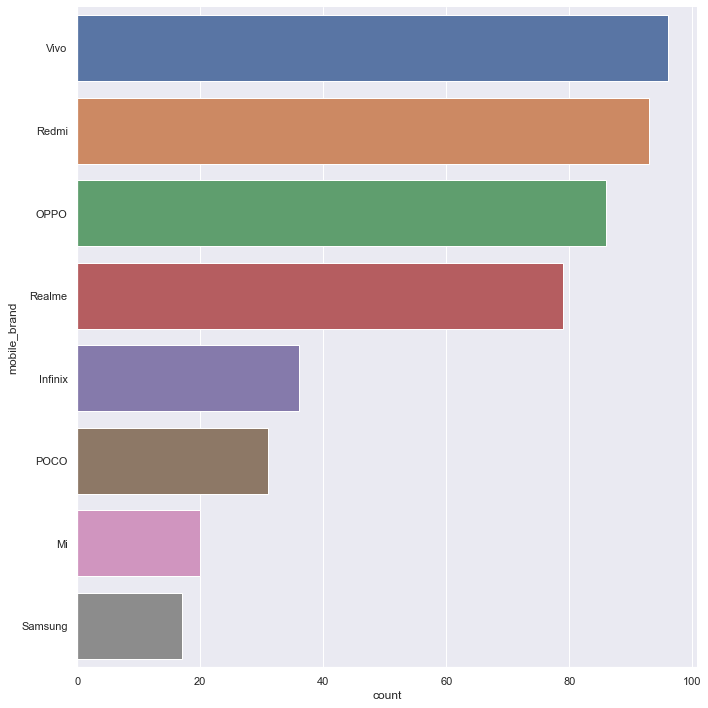

In [9]:
var = 'mobile_brand'
sb.catplot(y = var, data = mobileData, kind = "count", height = 10, order=mobileData[var].value_counts().index)

RedMi, vivo, OPPO and Redmi have developed majority of the phones than the rest. Vivo developed the most phones while samsung developed the least phones in recent years. This is a little odd as Samsung has better reputation compared to the other phones which i would assume that Samsung would come out with more phones to earn more profit using its reputation. 

# Uni-Variate Analysis(mobile_color)

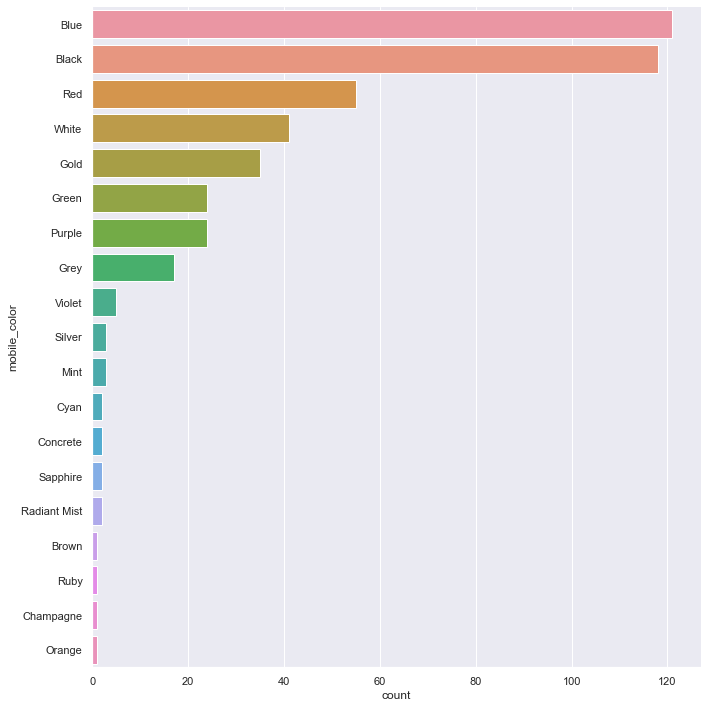

In [10]:
var = 'mobile_color'
sb.catplot(y = var, data = mobileData, kind = "count", height = 10, order=mobileData[var].value_counts().index)

Blue has most preference and common followed by Black colou. Both there colours are most preferred. 
Least and rarer colour includes sapphire, concrete, cyan, mint, silver, Radiant Mist,  Champagne, Cyan, Brown, Silver, Concrete, Orange and Ruby.

# Uni-Variate Analysis(dual_sim)

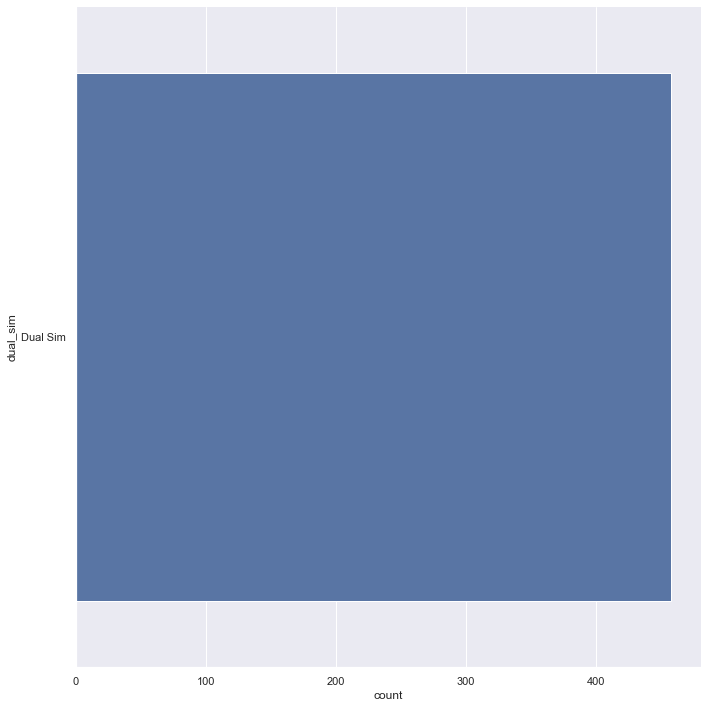

In [11]:
var = 'dual_sim'
sb.catplot(y = var, data = mobileData, kind = "count", height = 10, order=mobileData[var].value_counts().index)

All phone have duoSimcard due to the trending of duoSim in the market. 

# Uni-Variate Analysis(os)

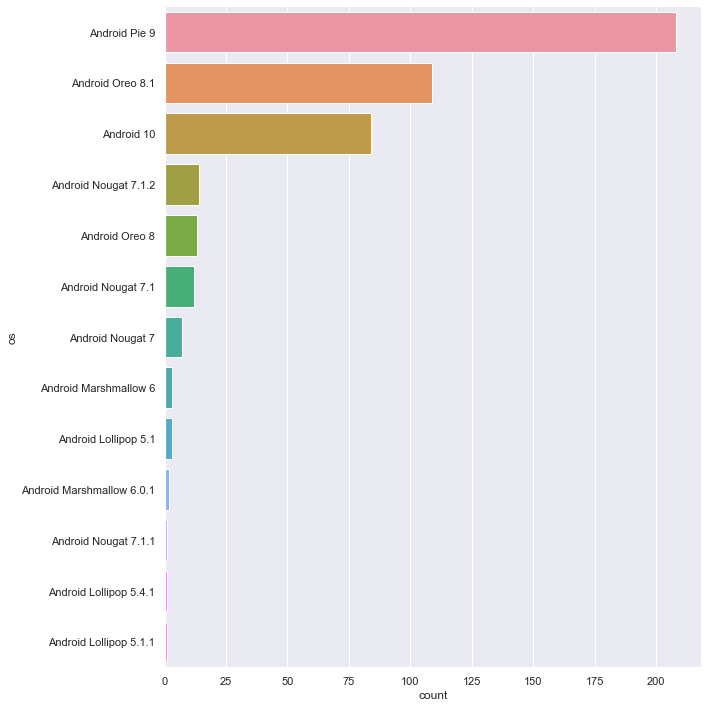

In [12]:
var = 'os'
sb.catplot(y = var, data = mobileData, kind = "count", height = 10, order=mobileData[var].value_counts().index)

Most Phone uses Android 10, Andriod Pie 9 and Android 8.1 operating system perhaps due to better performance

# Uni-Variate Analysis(num_cores)

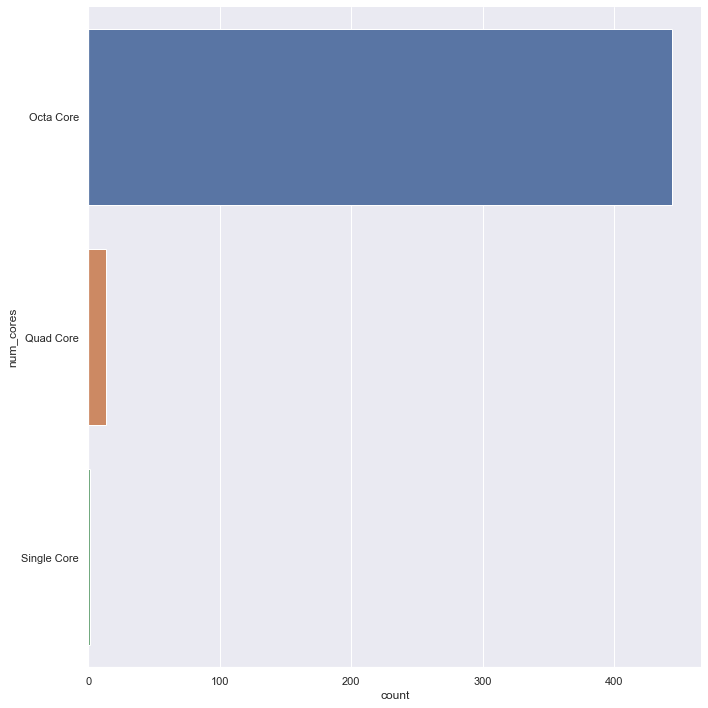

In [13]:
var = 'num_cores'
sb.catplot(y = var, data = mobileData, kind = "count", height = 10, order=mobileData[var].value_counts().index)

Majority models have Octa core processor also probably due to the trend and people like their phone working faster with larger number of core processor.

# Uni-Variate Analysis(network_top)

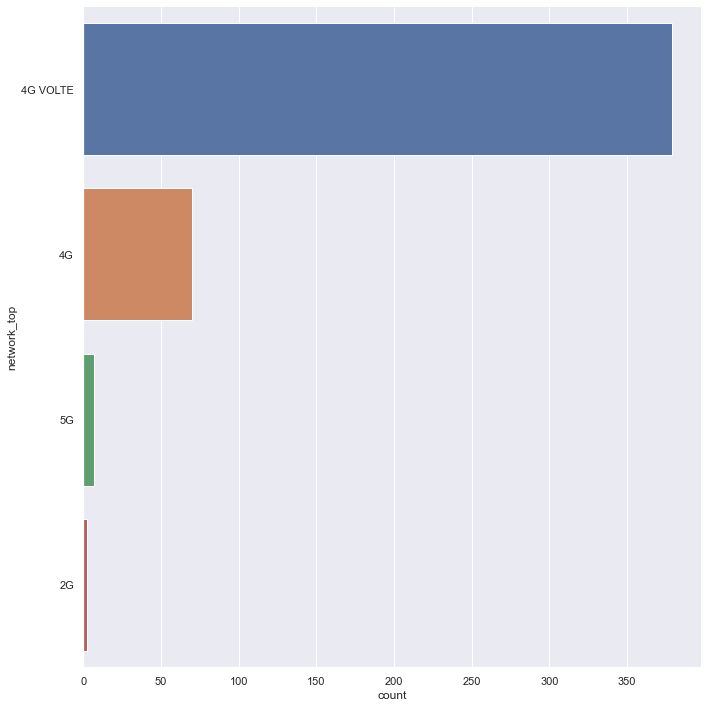

In [14]:
var = 'network_top'
sb.catplot(y = var, data = mobileData, kind = "count", height = 10, order=mobileData[var].value_counts().index)

In terms of network, most phone use 4G VOLTE network while only 7 uses 5G which is significantly faster. Here, we can observe the flow and shifting of the development direction of network_top going to higher value of "G" as the slower network system like 2G is being left out. 

# Uni-Variate Analysis(bluetooth)

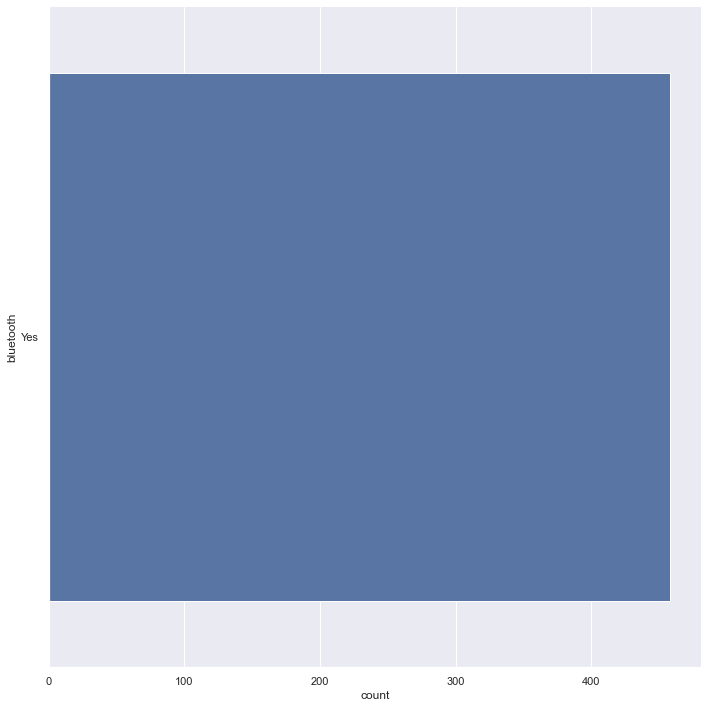

In [15]:
var = 'bluetooth'
sb.catplot(y = var, data = mobileData, kind = "count", height = 10, order=mobileData[var].value_counts().index)

Every phone now has Bluetooth feature which is a must in thie era as most external phone acessories is connected to the mobile phone through bletooth.

# Uni-Variate Analysis(f_cam_1)

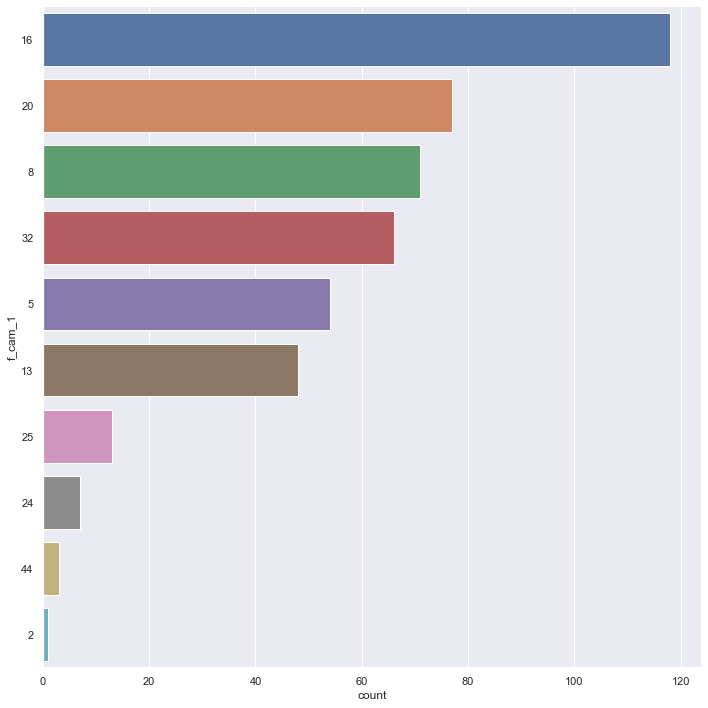

In [16]:
var = 'f_cam_1'
sb.catplot(y = var, data = mobileData, kind = "count", height = 10, order=mobileData[var].value_counts().index)

# Uni-Variate Analysis(f_cam_2)

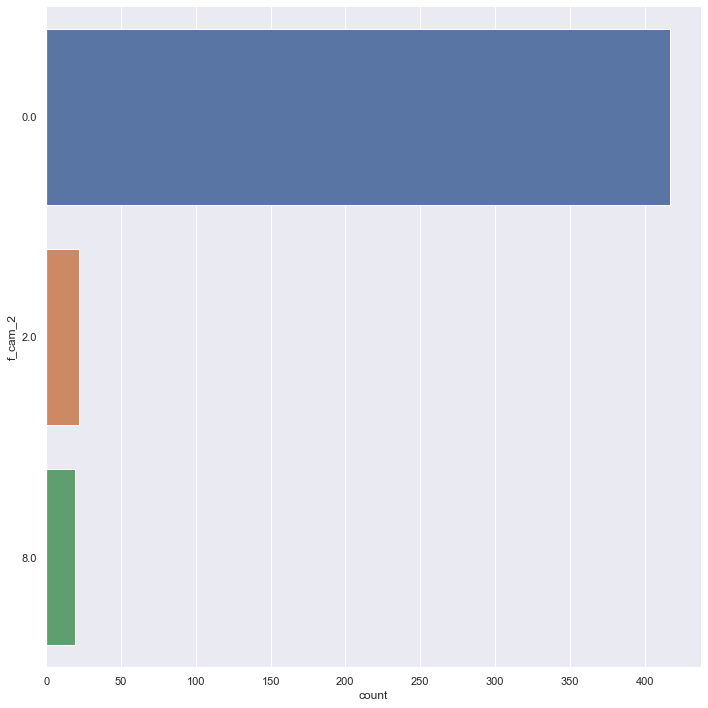

In [17]:
var = 'f_cam_2'
sb.catplot(y = var, data = mobileData, kind = "count", height = 10, order=mobileData[var].value_counts().index)

# Uni-Variate Analysis(p_cam_1)

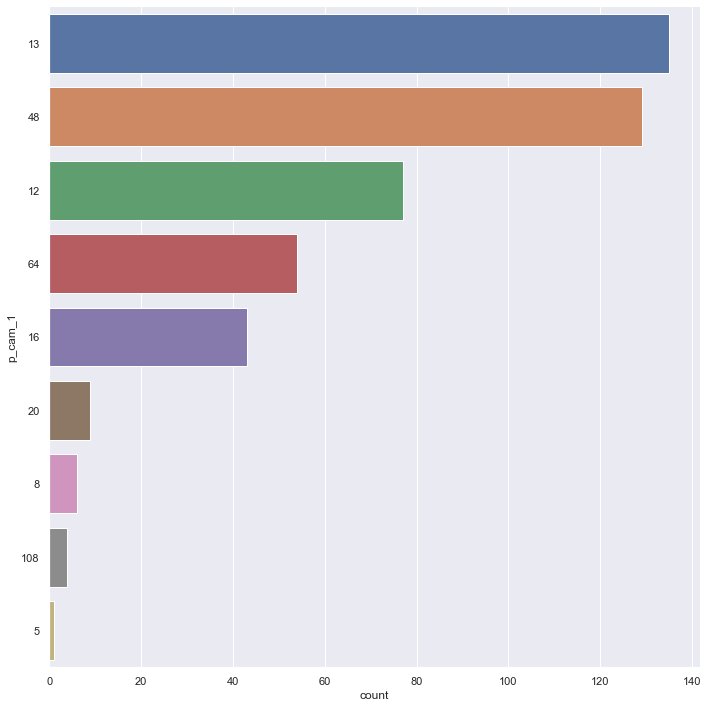

In [18]:
var = 'p_cam_1'
sb.catplot(y = var, data = mobileData, kind = "count", height = 10, order=mobileData[var].value_counts().index)

# Uni-Variate Analysis(p_cam_2)

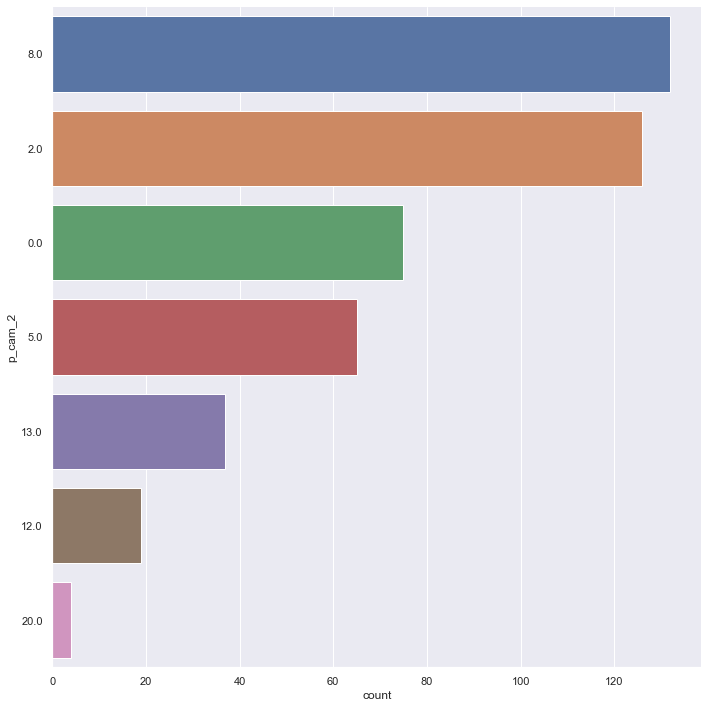

In [19]:
var = 'p_cam_2'
sb.catplot(y = var, data = mobileData, kind = "count", height = 10, order=mobileData[var].value_counts().index)

# Uni-Variate Analysis(p_cam_3)

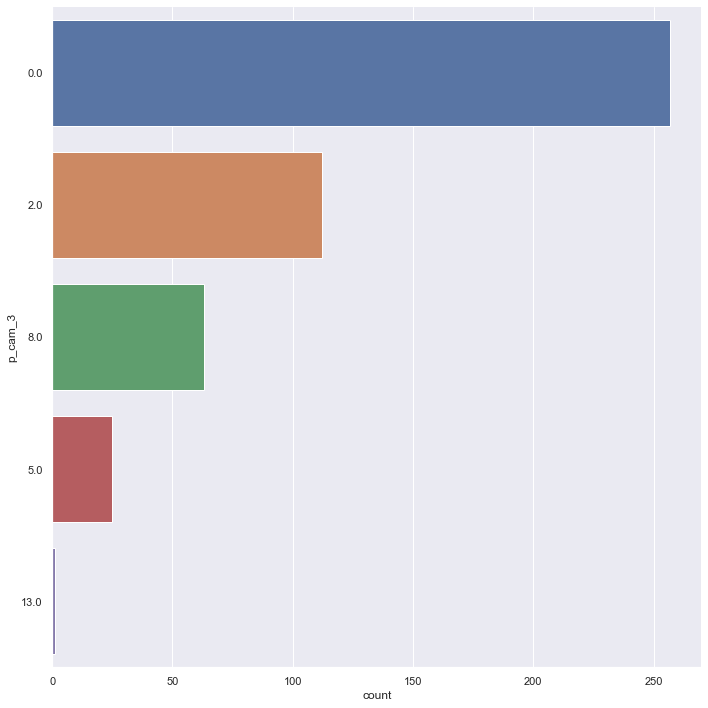

In [20]:
var = 'p_cam_3'
sb.catplot(y = var, data = mobileData, kind = "count", height = 10, order=mobileData[var].value_counts().index)

# Uni-Variate Analysis(p_cam_4)

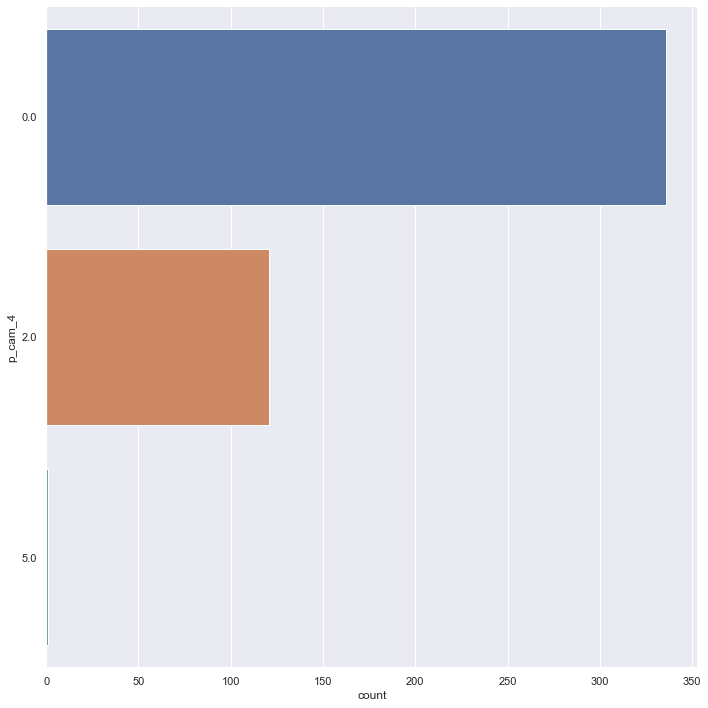

In [21]:
var = 'p_cam_4'
sb.catplot(y = var, data = mobileData, kind = "count", height = 10, order=mobileData[var].value_counts().index)

In terms of pixels of camera, it is not necessarily the higher the better, although it can be a determining factor in predicting the mobile_price, most company just accommodate their need and build moderate quality of camera on their phone

# Uni-Variate Analysis(Numerical Data) 

In [22]:
mobileNumDataFrame = mobileData[mobileNumData]
mobileNumDataFrame.head()
mobileNumDataFrame.describe()

,disp_size,mp_speed,int_memory,ram,battery_power,mob_width,mob_height,mob_depth,mob_weight,resolution_width,resolution_height,mobile_price
count,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000
mean,15.914651,2.117900,87.248908,4.884279,4163.810044,74.229541,157.761856,10.744978,180.375983,1769.772926,1102.480349,296.342795
std,0.802048,0.351277,64.904940,2.080895,614.375519,13.120374,12.216273,12.841650,17.827785,567.239452,440.992233,155.045918
min,11.940000,1.300000,8.000000,1.000000,2000.000000,8.350000,7.380000,7.300000,130.000000,540.000000,540.000000,107.000000
25%,15.705000,2.000000,40.000000,4.000000,4000.000000,75.000000,155.900000,8.100000,168.000000,1440.000000,720.000000,196.000000
50%,16.000000,2.000000,64.000000,4.000000,4030.000000,75.350000,158.700000,8.500000,183.000000,1600.000000,1080.000000,258.000000
75%,16.510000,2.300000,128.000000,6.000000,4500.000000,75.800000,162.000000,8.880000,191.000000,2340.000000,1080.000000,338.000000
max,17.020000,2.960000,512.000000,12.000000,6000.000000,159.000000,175.000000,92.000000,215.000000,2400.000000,2400.000000,1086.000000


In terms of Values:

Lowest STD: disp_size, mp_speed.

Low STD: ram,mob_height,mob_depth,mob_weight, mob_width

High STD: int_memory, battery_power, resolution_width, resolution_height, mobile_price

However, the value of STD cannot used to compare with different variables as they have different unit.

# Uni-Variate Analysis(disp_size) 

<AxesSubplot:>

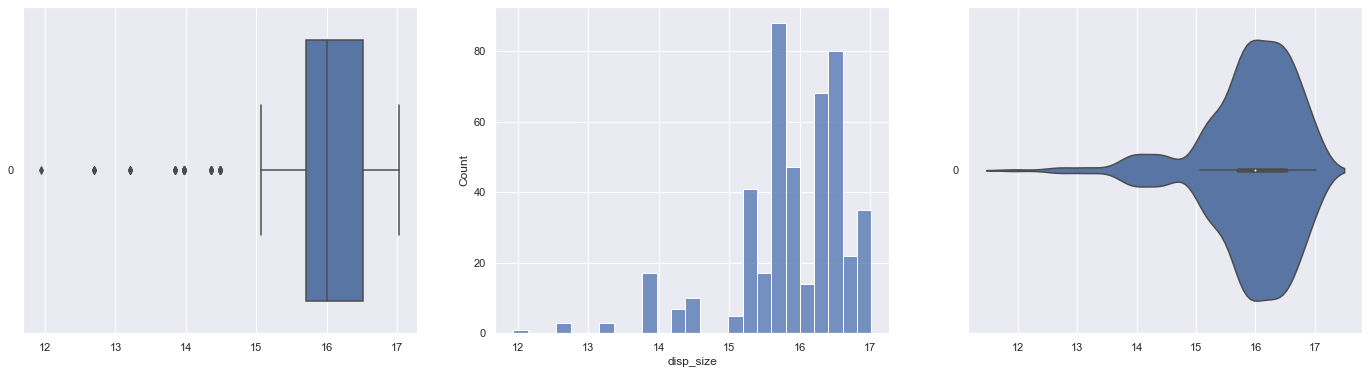

In [23]:
f, axes = plt.subplots(1,3,figsize=(24, 6))
var = 'disp_size'
sb.boxplot(data = mobileData[var], orient = "h", ax = axes[0])
sb.histplot(data = mobileData[var], ax = axes[1])
sb.violinplot(data = mobileData[var], orient = "h", ax = axes[2])
  

# Uni-Variate Analysis(mp_speed) 

<AxesSubplot:>

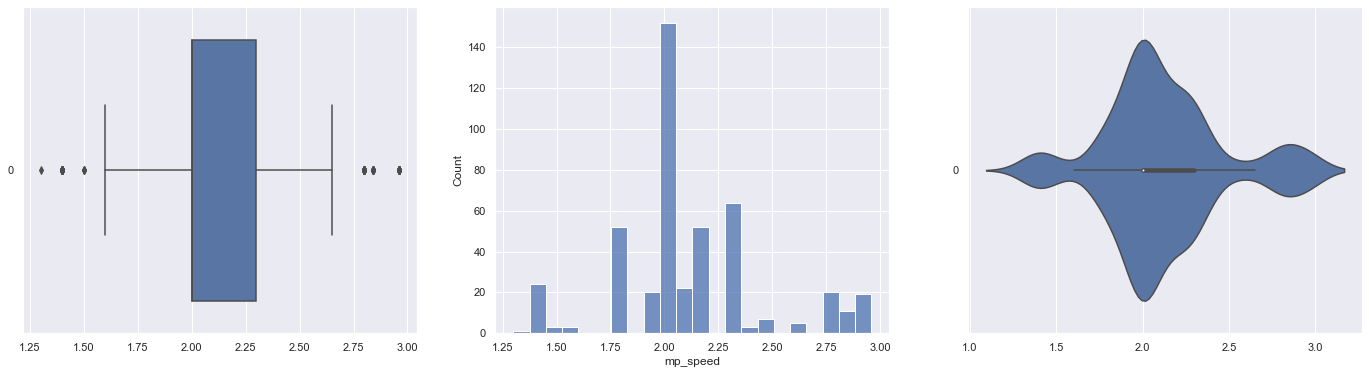

In [24]:
f, axes = plt.subplots(1,3,figsize=(24, 6))
var = 'mp_speed'
sb.boxplot(data = mobileData[var], orient = "h", ax = axes[0])
sb.histplot(data = mobileData[var], ax = axes[1])
sb.violinplot(data = mobileData[var], orient = "h", ax = axes[2])
  

# Uni-Variate Analysis(int_memory) 

<AxesSubplot:>

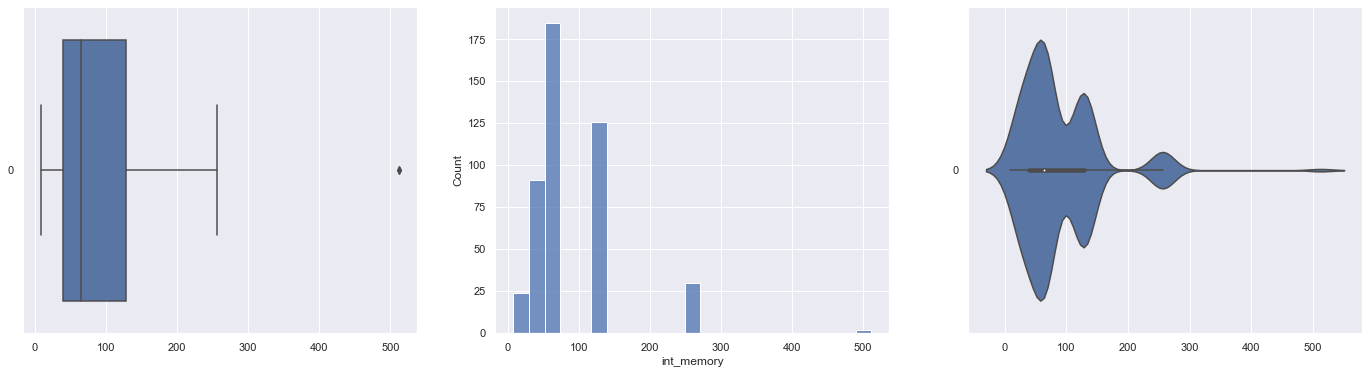

In [25]:
f, axes = plt.subplots(1,3,figsize=(24, 6))
var = 'int_memory'
sb.boxplot(data = mobileData[var], orient = "h", ax = axes[0])
sb.histplot(data = mobileData[var], ax = axes[1])
sb.violinplot(data = mobileData[var], orient = "h", ax = axes[2])
  

# Uni-Variate Analysis(ram) 

<AxesSubplot:>

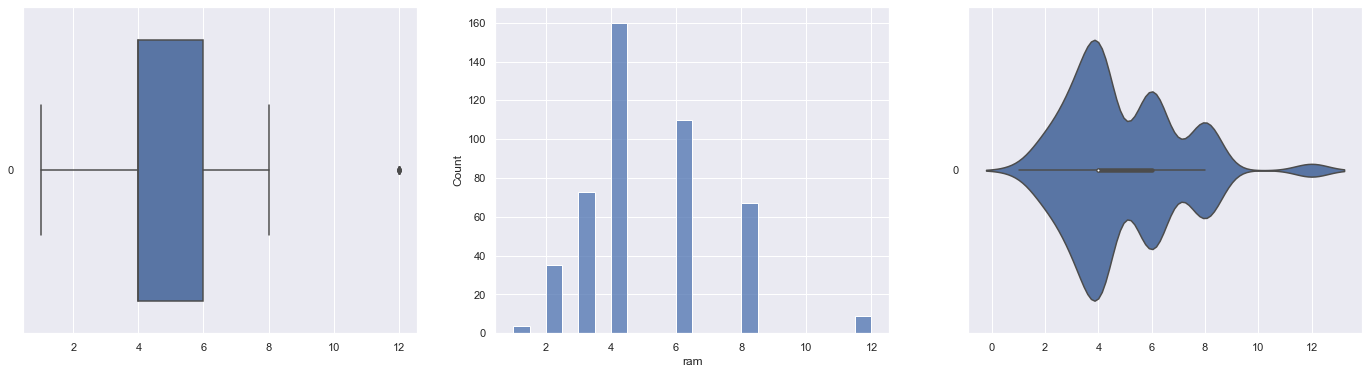

In [26]:
f, axes = plt.subplots(1,3,figsize=(24, 6))
var = 'ram'
sb.boxplot(data = mobileData[var], orient = "h", ax = axes[0])
sb.histplot(data = mobileData[var], ax = axes[1])
sb.violinplot(data = mobileData[var], orient = "h", ax = axes[2])
  

# Uni-Variate Analysis(battery_power) 

<AxesSubplot:>

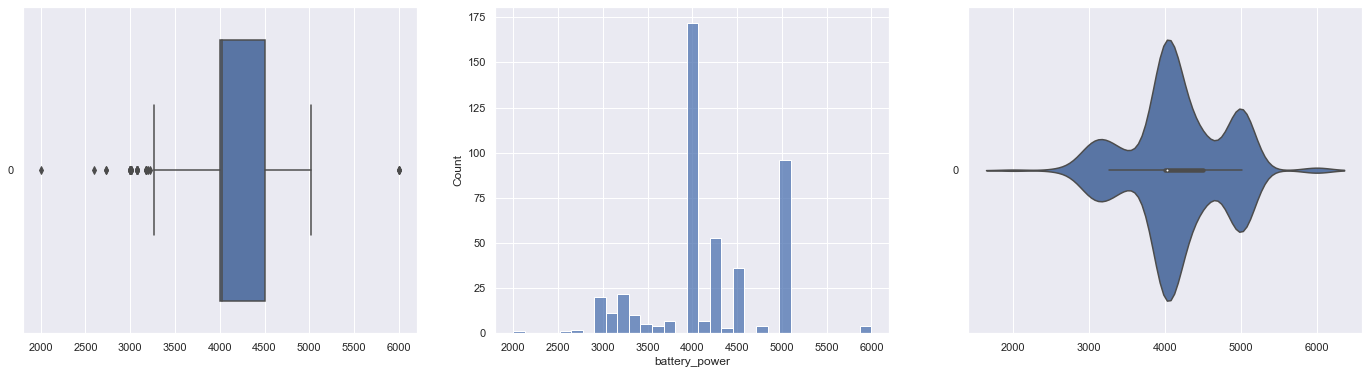

In [27]:
f, axes = plt.subplots(1,3,figsize=(24, 6))
var = 'battery_power'
sb.boxplot(data = mobileData[var], orient = "h", ax = axes[0])
sb.histplot(data = mobileData[var], ax = axes[1])
sb.violinplot(data = mobileData[var], orient = "h", ax = axes[2])
  

# Uni-Variate Analysis(mob_width) 

<AxesSubplot:>

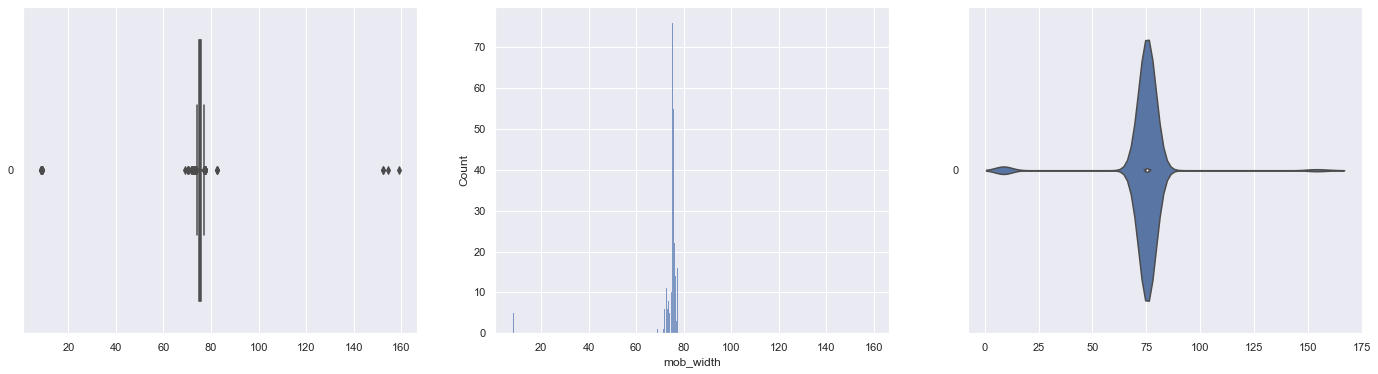

In [28]:
f, axes = plt.subplots(1,3,figsize=(24, 6))
var = 'mob_width'
sb.boxplot(data = mobileData[var], orient = "h", ax = axes[0])
sb.histplot(data = mobileData[var], ax = axes[1])
sb.violinplot(data = mobileData[var], orient = "h", ax = axes[2])
  

# Uni-Variate Analysis(mob_height) 

<AxesSubplot:>

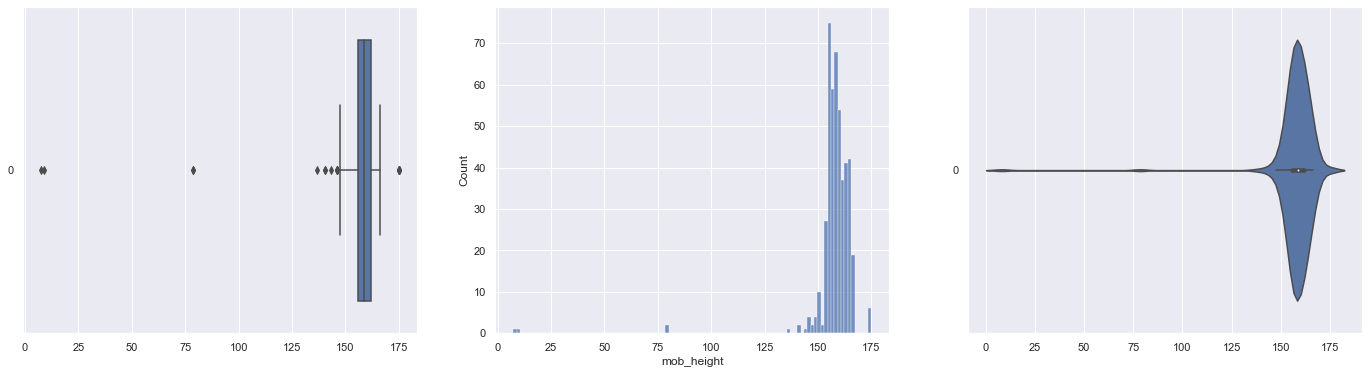

In [29]:
f, axes = plt.subplots(1,3,figsize=(24, 6))
var = 'mob_height'
sb.boxplot(data = mobileData[var], orient = "h", ax = axes[0])
sb.histplot(data = mobileData[var], ax = axes[1])
sb.violinplot(data = mobileData[var], orient = "h", ax = axes[2])
  

# Uni-Variate Analysis(mob_depth) 

<AxesSubplot:>

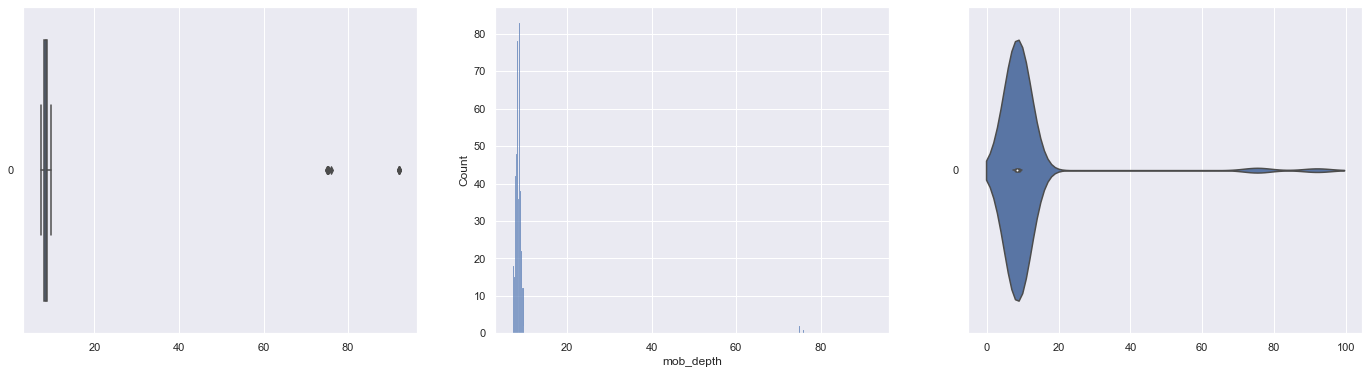

In [30]:
f, axes = plt.subplots(1,3,figsize=(24, 6))
var = 'mob_depth'
sb.boxplot(data = mobileData[var], orient = "h", ax = axes[0])
sb.histplot(data = mobileData[var], ax = axes[1])
sb.violinplot(data = mobileData[var], orient = "h", ax = axes[2])
  

# Uni-Variate Analysis(mob_weight) 

<AxesSubplot:>

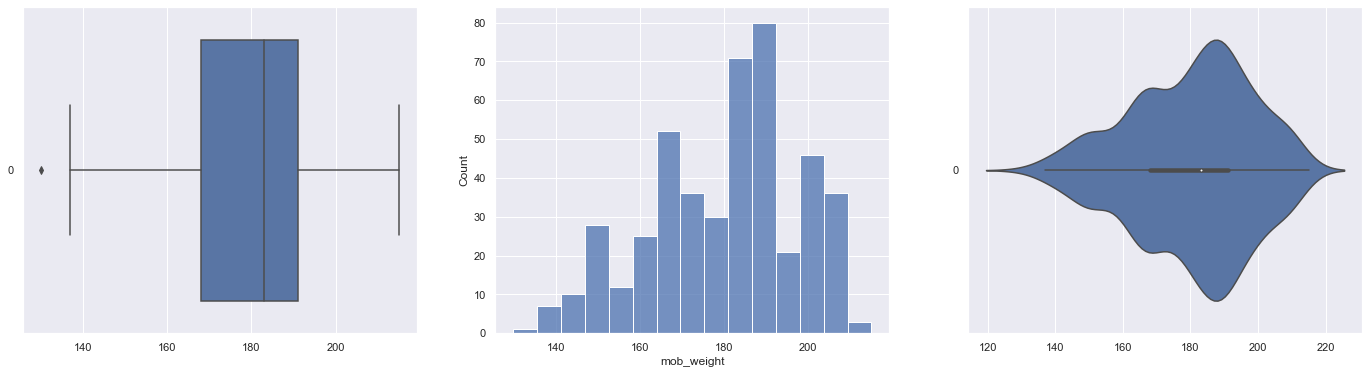

In [31]:
f, axes = plt.subplots(1,3,figsize=(24, 6))
var = 'mob_weight'
sb.boxplot(data = mobileData[var], orient = "h", ax = axes[0])
sb.histplot(data = mobileData[var], ax = axes[1])
sb.violinplot(data = mobileData[var], orient = "h", ax = axes[2])
  

# Uni-Variate Analysis(resolution_width) 

<AxesSubplot:>

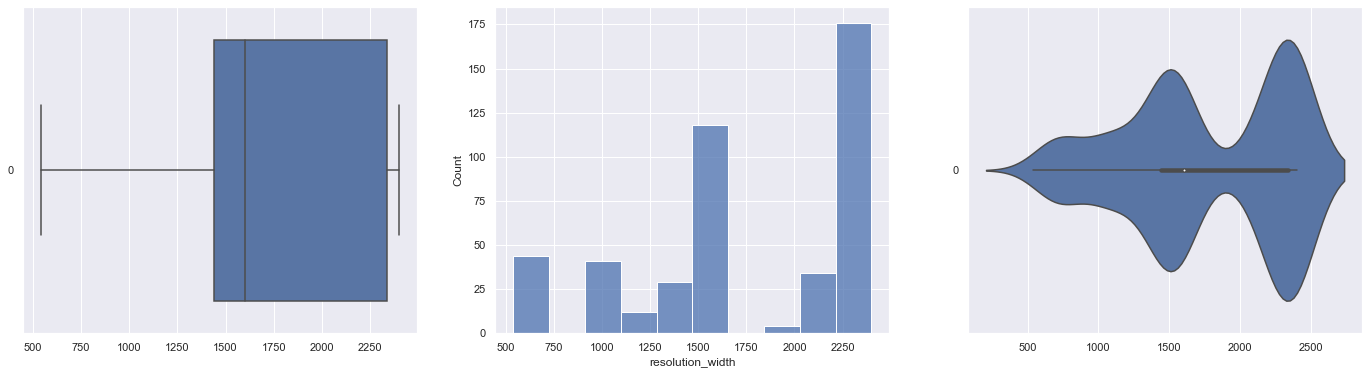

In [32]:
f, axes = plt.subplots(1,3,figsize=(24, 6))
var = 'resolution_width'
sb.boxplot(data = mobileData[var], orient = "h", ax = axes[0])
sb.histplot(data = mobileData[var], ax = axes[1])
sb.violinplot(data = mobileData[var], orient = "h", ax = axes[2])
  

# Uni-Variate Analysis(resolution_height) 

<AxesSubplot:>

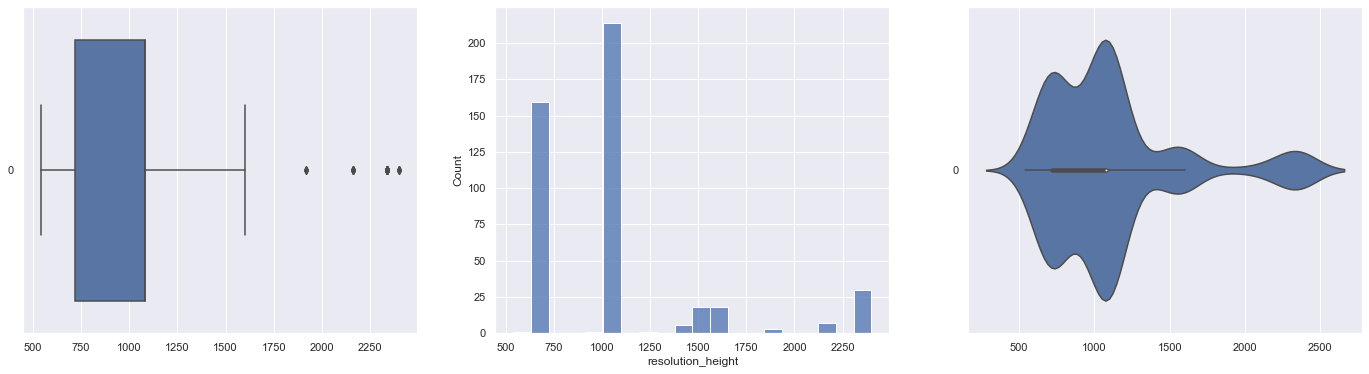

In [33]:
f, axes = plt.subplots(1,3,figsize=(24, 6))
var = 'resolution_height'
sb.boxplot(data = mobileData[var], orient = "h", ax = axes[0])
sb.histplot(data = mobileData[var], ax = axes[1])
sb.violinplot(data = mobileData[var], orient = "h", ax = axes[2])
  

# Uni-Variate Analysis(mobile_price) 

<AxesSubplot:>

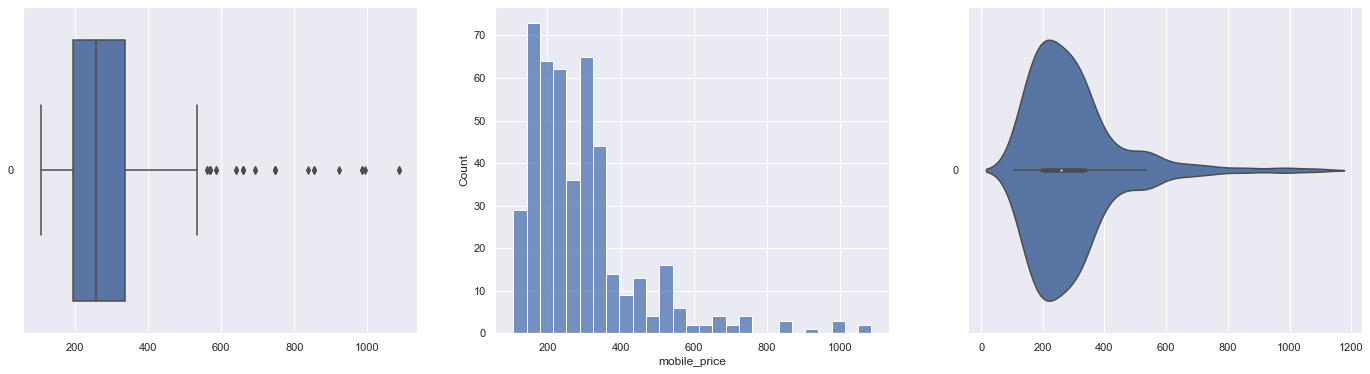

In [34]:
f, axes = plt.subplots(1,3,figsize=(24, 6))
var = 'mobile_price'
sb.boxplot(data = mobileData[var], orient = "h", ax = axes[0])
sb.histplot(data = mobileData[var], ax = axes[1])
sb.violinplot(data = mobileData[var], orient = "h", ax = axes[2])
  

Ratio Wise: 

disp_size, mp_speed, int_memory, ram,battery_power, resolution_height, mobile_price) have almost similar compactness and central tendency with less spread of data compare to (mob_width, mob_weight) which has wider spread of data

As for (mob_width, mob_height, mob_depth) has higher central tendency and lower spread of data, hence it is more compact


In [35]:
def numOutliers(DF):
    # finding the 1st quartile
    q1 = np.quantile(DF, 0.25)
    # finding the 3rd quartile
    q3 = np.quantile(DF, 0.75)
    med = np.median(DF)
    # finding the iqr region
    iqr = q3-q1
    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outliers = DF[(DF <= lower_bound) | (DF >= upper_bound)]
    print("The number of OutLiers = " + str(outliers.size))
    
    
for var in mobileNumDataFrame:
    print("For " +str(var) +",")
    numOutliers(mobileNumDataFrame[var])

For disp_size,
The number of OutLiers = 41
For mp_speed,
The number of OutLiers = 78
For int_memory,
The number of OutLiers = 2
For ram,
The number of OutLiers = 13
For battery_power,
The number of OutLiers = 47
For mob_width,
The number of OutLiers = 88
For mob_height,
The number of OutLiers = 18
For mob_depth,
The number of OutLiers = 14
For mob_weight,
The number of OutLiers = 1
For resolution_width,
The number of OutLiers = 0
For resolution_height,
The number of OutLiers = 40
For mobile_price,
The number of OutLiers = 29


mob_width has the largest number of outliers while resolution_width has 0 outliers which is good.
this means that the resolution_width has cleaner data.

# Characteristic of SmartPhone Brands

# mobile_brand x disp_size

<AxesSubplot:xlabel='mobile_brand', ylabel='disp_size'>

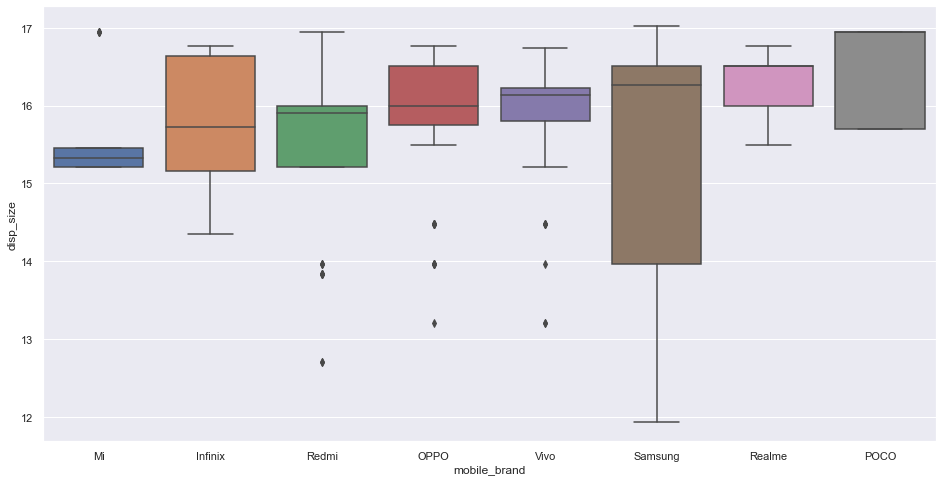

In [36]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mobile_brand', y = 'disp_size', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['disp_size'].median().sort_values().index)


POCO's disp_size is highly standardized and has the largest median of disp_size (medien is overlapped with Q3) with very clean data compared to the rest. 

POCO is followed by Realme where it's median is also overlapped with Q3, Realme is also quite standardized in terms of data spread as it does not have any outliers too.

Samsung has the largest range of disp_size values.

Overall, if a value of disp_size is given, we would guess it belongs to Samsung as it covers the most range. The varietion in disp_size by medien of all the brands are also quite differentiable. So there is a relation of disp_size and mobile_brand. mobile_brand can be a relevent factor in deciding the disp_size.

# mobile_brand x mp_speed

<AxesSubplot:xlabel='mobile_brand', ylabel='mp_speed'>

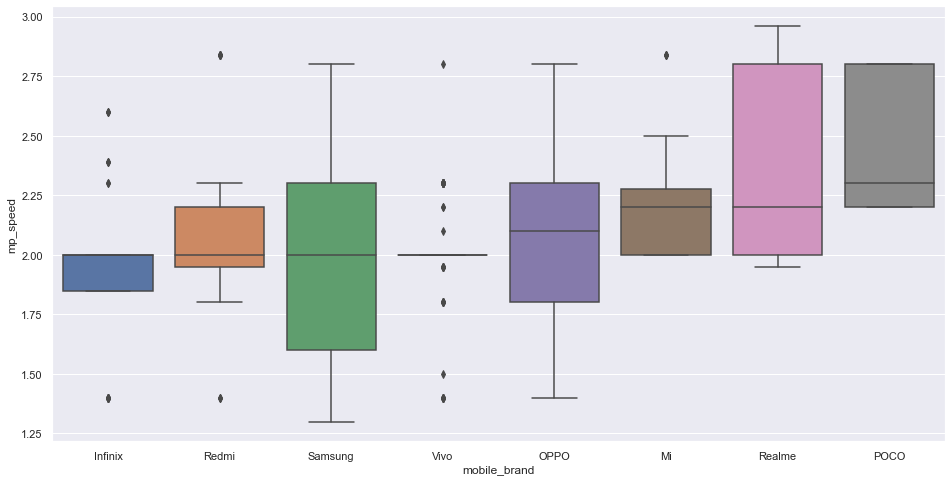

In [37]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mobile_brand', y = 'mp_speed', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['mp_speed'].median().sort_values().index)


mp_speed can be seperated into 3 sections having almost the same speed for each brand in each section:

High: POCO(Highest) 

Medium: Realme & Mi & OPPO

Low: Vivo & Samsung & Redmi & Infinix(Slowest)

Hence, if given a mp_speed value, it is very difficult to determine which phone it belongs to, but we at least know which category it might fall into.

# mobile_brand x int_memory

<AxesSubplot:xlabel='mobile_brand', ylabel='int_memory'>

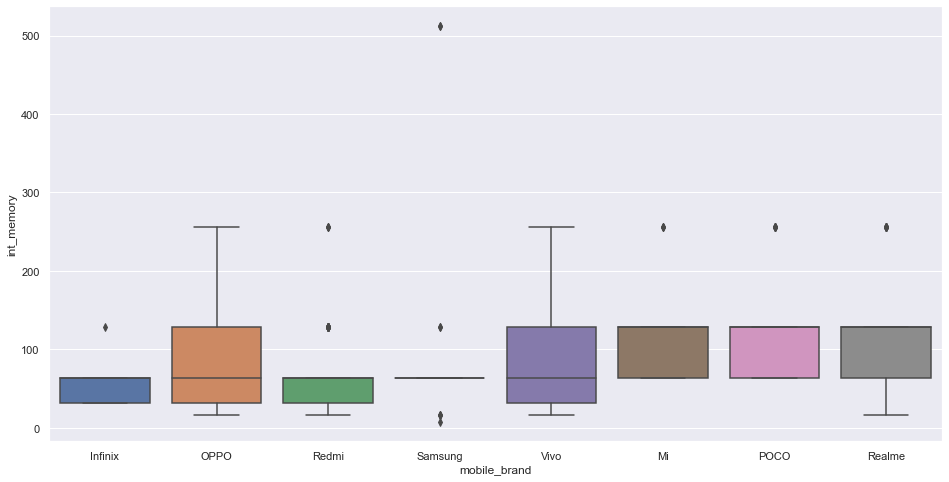

In [38]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mobile_brand', y = 'int_memory', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['int_memory'].median().sort_values().index)


All the phone does not show too much variation in int_memory(internal memory). Internal Memory specificatipon is very standardized. 

# mobile_brand x ram

<AxesSubplot:xlabel='mobile_brand', ylabel='ram'>

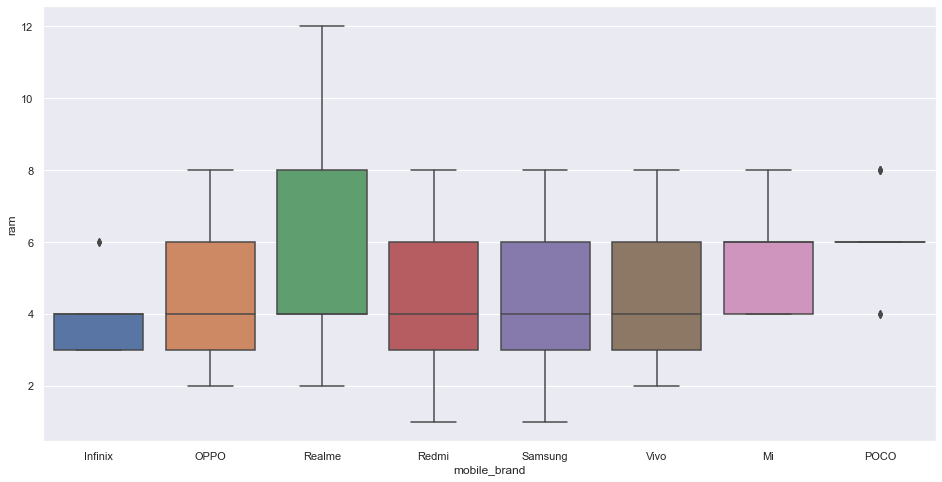

In [39]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mobile_brand', y = 'ram', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['ram'].median().sort_values().index)


POCO has the most distinctive highest ram among the rest which can be easilly identified if given a value of high ram.

Overall, ram values does not have a strong relationship with mobile_brand.

# mobile_brand x battery_power

<AxesSubplot:xlabel='mobile_brand', ylabel='battery_power'>

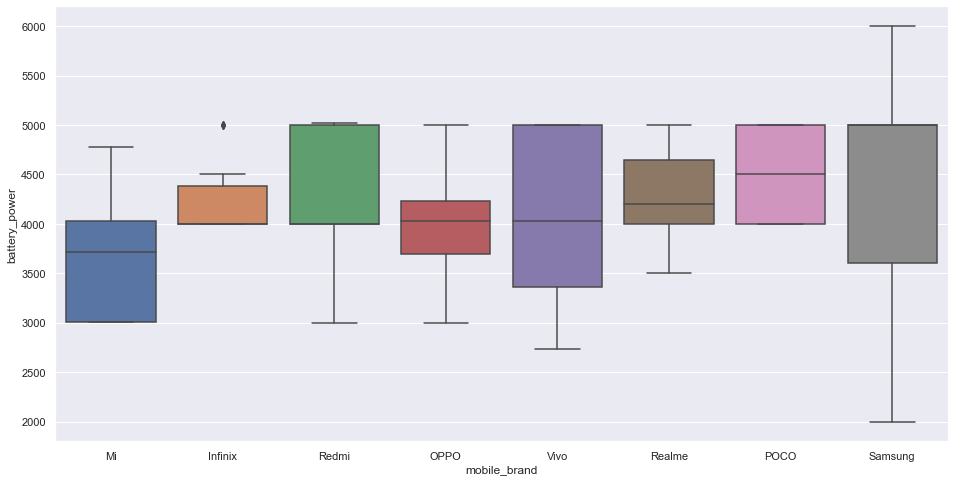

In [40]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mobile_brand', y = 'battery_power', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['battery_power'].median().sort_values().index)


Samsung has highest but also most wide spread of battery power values due to more models being sampled while MI has the lowest battery_power.

There is a clear partition of mobile_brands using battery_power values for classification in general but Infinix, Redmi, Vivo and OPPO are extremely close to each other.

# mobile_brand x mob_width

<AxesSubplot:xlabel='mobile_brand', ylabel='mob_width'>

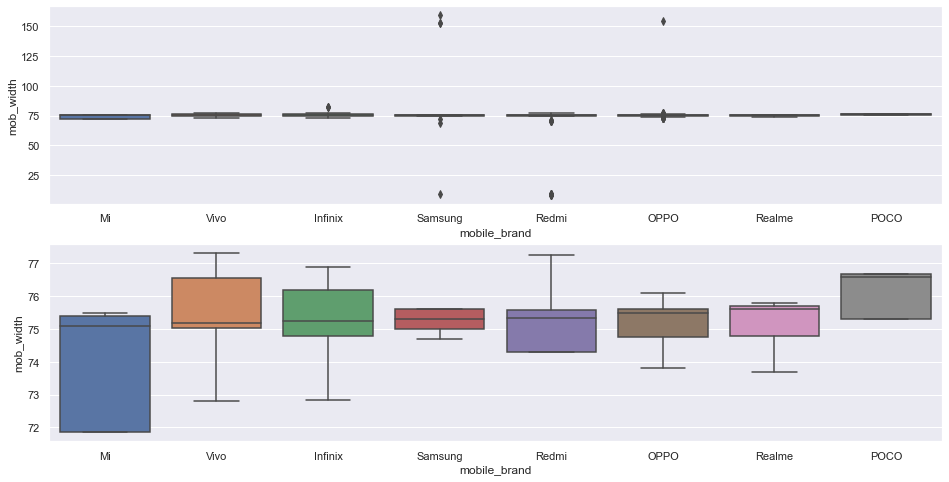

<Figure size 1152x576 with 0 Axes>

In [41]:
f,axes = plt.subplots(2,1,figsize=(16, 8))
sb.boxplot(x = 'mobile_brand', y = 'mob_width', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['mob_width'].median().sort_values().index, ax = axes[0])
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mobile_brand', y = 'mob_width', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['mob_width'].median().sort_values().index, showfliers = False, ax = axes[1])


# mobile_brand x mob_height

<AxesSubplot:xlabel='mobile_brand', ylabel='mob_height'>

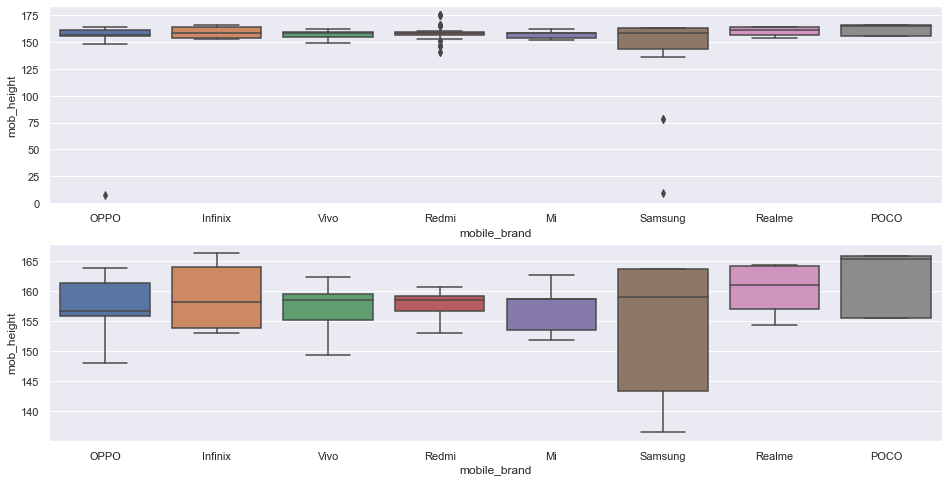

In [42]:
f,axes = plt.subplots(2,1,figsize=(16, 8))
sb.boxplot(x = 'mobile_brand', y = 'mob_height', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['mob_height'].median().sort_values().index, ax = axes[0])

sb.boxplot(x = 'mobile_brand', y = 'mob_height', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['mob_height'].median().sort_values().index, showfliers = False, ax = axes[1])


mobile_width,mobile_height has almost no relation in determining and classifying the brand of mobil phone. Samsung, Realme and OPPO has ceated some reall bizarre phones with extreme width,height,depth values. Hence, causing some extreme faraway outliers.


# mobile_brand x mob_depth

<AxesSubplot:xlabel='mobile_brand', ylabel='mob_depth'>

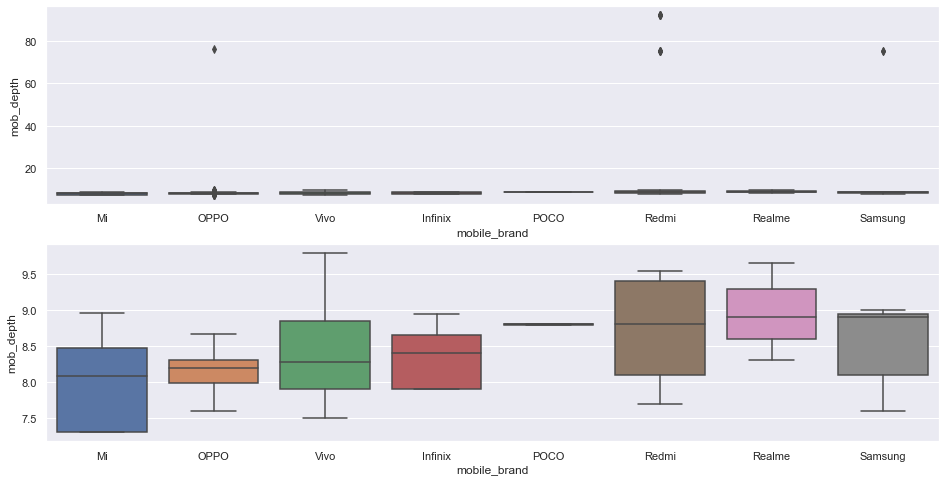

In [43]:
f,axes = plt.subplots(2,1,figsize=(16, 8))
sb.boxplot(x = 'mobile_brand', y = 'mob_depth', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['mob_depth'].median().sort_values().index, ax = axes[0])
sb.boxplot(x = 'mobile_brand', y = 'mob_depth', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['mob_depth'].median().sort_values().index, showfliers = False,ax = axes[1])


# mobile_brand x mob_weight

<AxesSubplot:xlabel='mobile_brand', ylabel='mob_weight'>

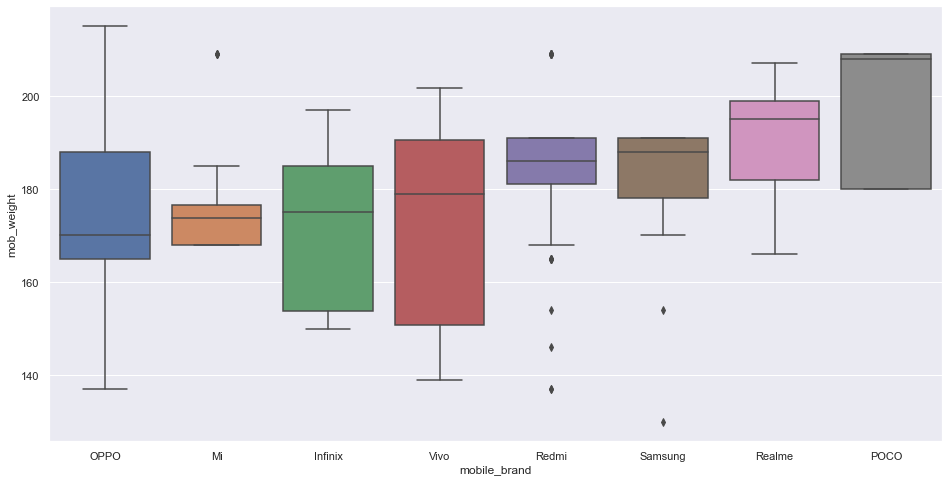

In [44]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mobile_brand', y = 'mob_weight', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['mob_weight'].median().sort_values().index)


Except for OPPO,Mi,Infinix, and Vivo, the mob_weight has some distinct patterns in each brands of phones. To a certain extent, mob_weight can be a predictor for classifying the mobile phones.

# mobile_brand x resolution_width

<AxesSubplot:xlabel='mobile_brand', ylabel='resolution_width'>

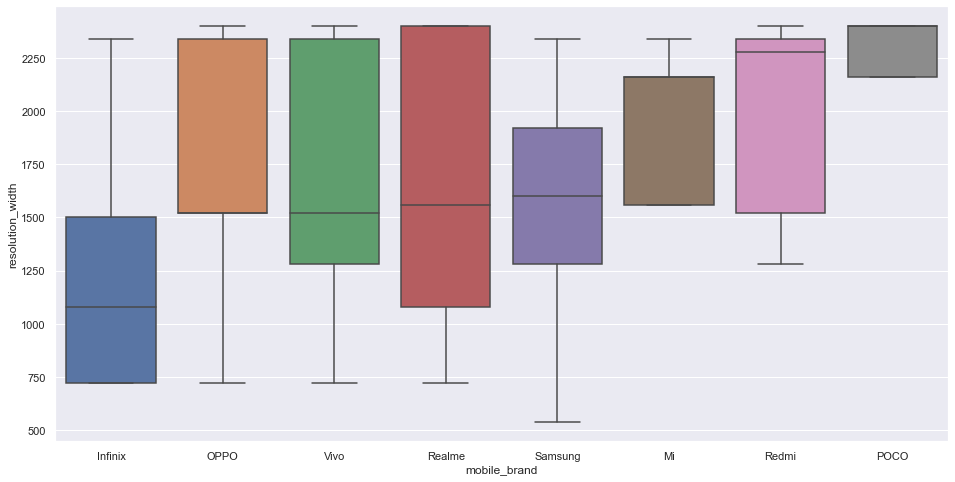

In [45]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mobile_brand', y = 'resolution_width', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['resolution_width'].median().sort_values().index)

Except for OPPO,VIVO,Realme and Samsung, the other phone brands has clear distinct values of resolution_width, hence resolution_width has a decent relation with phoine brands to a certain extent.

# mobile_brand x resolution_height

<AxesSubplot:xlabel='mobile_brand', ylabel='resolution_height'>

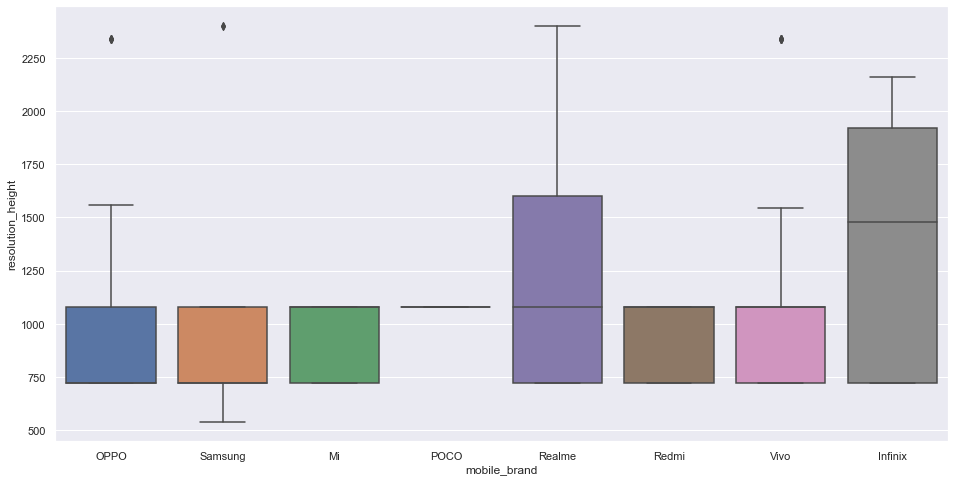

In [46]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mobile_brand', y = 'resolution_height', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['resolution_height'].median().sort_values().index)


The values of resolution height is almost the same with every phone brand. But Infinix seems to have the special characteristic of huge resolution height

# mobile_brand x mobile_price

<AxesSubplot:xlabel='mobile_brand', ylabel='mobile_price'>

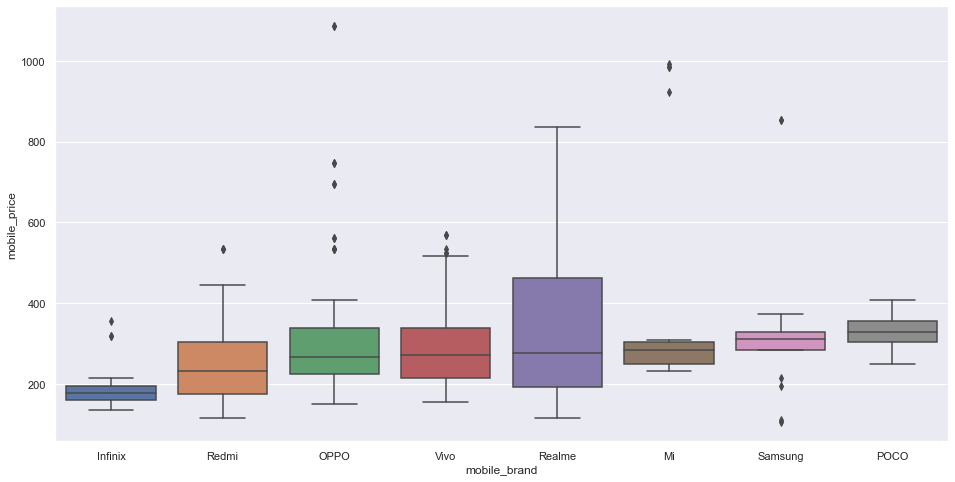

In [47]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mobile_brand', y = 'mobile_price', data = mobileData, 
           order = mobileData.groupby('mobile_brand')['mobile_price'].median().sort_values().index)


POCO, Samsung, Mi has norrow range for mobile_price. It's spread is lower and also more expensive compared to others.

Realme,Vivo,OPPO and Redmi has wider range of phone prices(quality is more variant)

Infinix has lower price in general and also narrower range(less spread)

mobile_price is quite standardized for every phone brand.

# mobile_brand x os

<AxesSubplot:xlabel='mobile_brand', ylabel='os'>

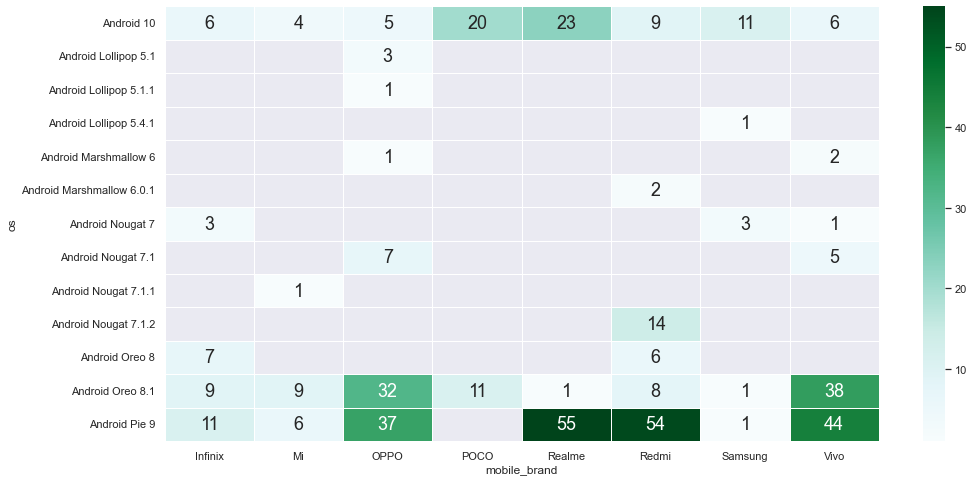

In [48]:
f = plt.figure(figsize=(16, 8))
sb.heatmap(mobileData.groupby(['os', 'mobile_brand']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

Mojority of the phone uses Andriod10, AndriodPie9.0,AndriodPie9 and Andriod Oreo 8.1
Realme and Redmi put their main focus in using Andriod Pie 9 OS.

Some odd ones are used by OPPO uses Andriod Marshmallow 6, Infinix uses Andriod Nougat 7.1.1 and Samsung uses Andriod Lollipop 5.4.1

# mobile_brand x num_cores

<AxesSubplot:xlabel='mobile_brand', ylabel='num_cores'>

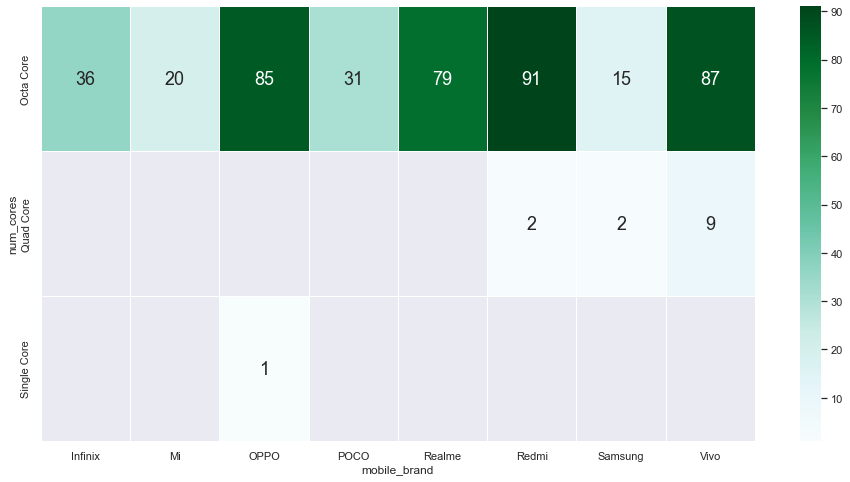

In [49]:
f = plt.figure(figsize=(16, 8))
sb.heatmap(mobileData.groupby(['num_cores', 'mobile_brand']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

Majority are Octa Core, some are Quad Core, minority uses quadcore but only OPPO produces Single Core machine.

This shows how mobile phones are following up with the trend and improve their phone performance by increasing then number of core. On the other hand, little of the POCO phone that uses Single core still survive today just proves how high quality it is even with using just 1 core to operate the phone.

# mobile_brand x network_top

<AxesSubplot:xlabel='mobile_brand', ylabel='network_top'>

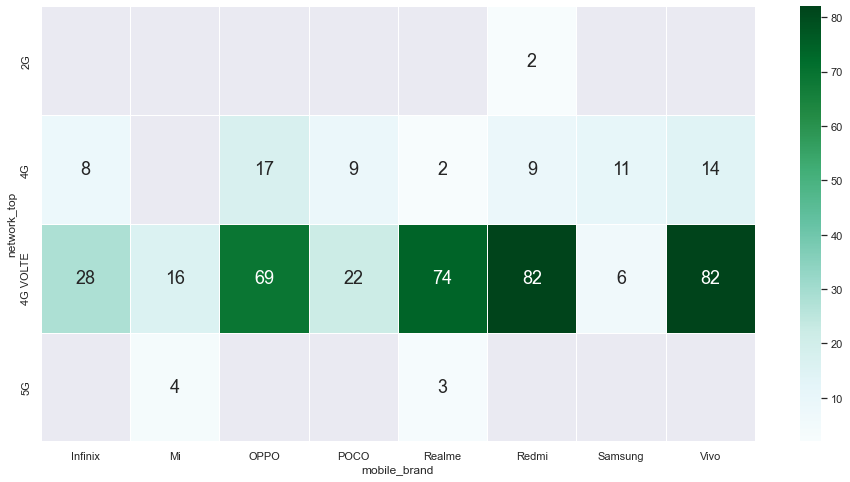

In [50]:
f = plt.figure(figsize=(16, 8))
sb.heatmap(mobileData.groupby(['network_top', 'mobile_brand']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")


Most Phone are standardized at using 4G Volte network system

Rare and more advanced brands like Mi and Realme able to access 5G technology

Redmi produces some 2G phone aside majoring in produccing phones in 4G Volte 

This also shows the trend of most (almost all) company focusing on 4G or 4G VOLTE and moving forward towards a faster network system rather than being stagnent.

# mobile_brand x bluetooth

<AxesSubplot:xlabel='mobile_brand', ylabel='bluetooth'>

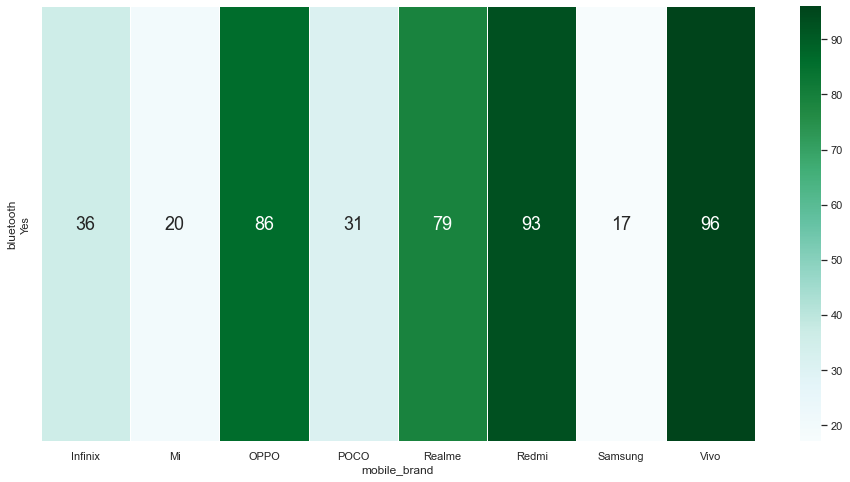

In [51]:
f = plt.figure(figsize=(16, 8))
sb.heatmap(mobileData.groupby(['bluetooth', 'mobile_brand']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

All Phone has bluetooth

# mobile_brand x f_cam_1

<AxesSubplot:xlabel='mobile_brand', ylabel='f_cam_1'>

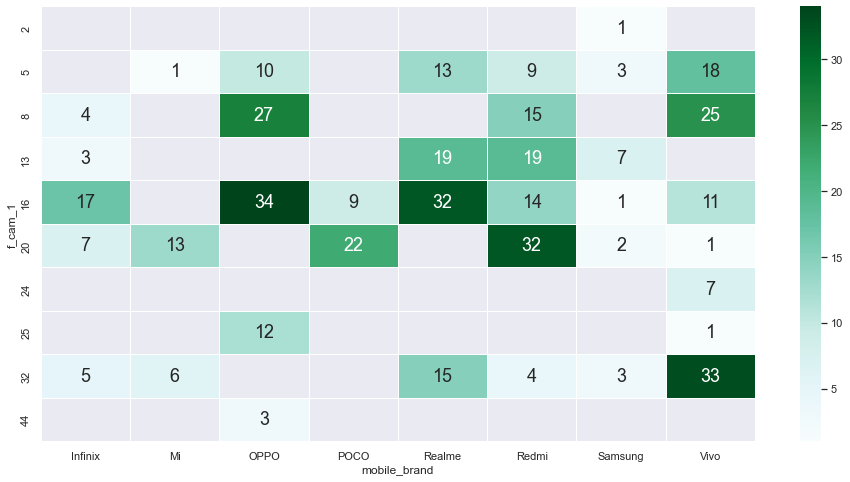

In [52]:
f = plt.figure(figsize=(16, 8))
sb.heatmap(mobileData.groupby(['f_cam_1', 'mobile_brand']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")


# mobile_brand x f_cam_2

<AxesSubplot:xlabel='mobile_brand', ylabel='f_cam_2'>

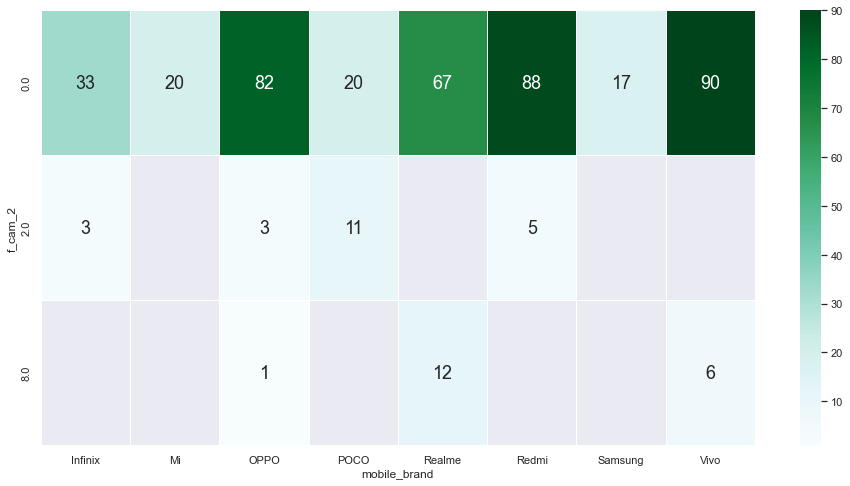

In [53]:
f = plt.figure(figsize=(16, 8))
sb.heatmap(mobileData.groupby(['f_cam_2', 'mobile_brand']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")


# mobile_brand x p_cam_1

<AxesSubplot:xlabel='mobile_brand', ylabel='p_cam_1'>

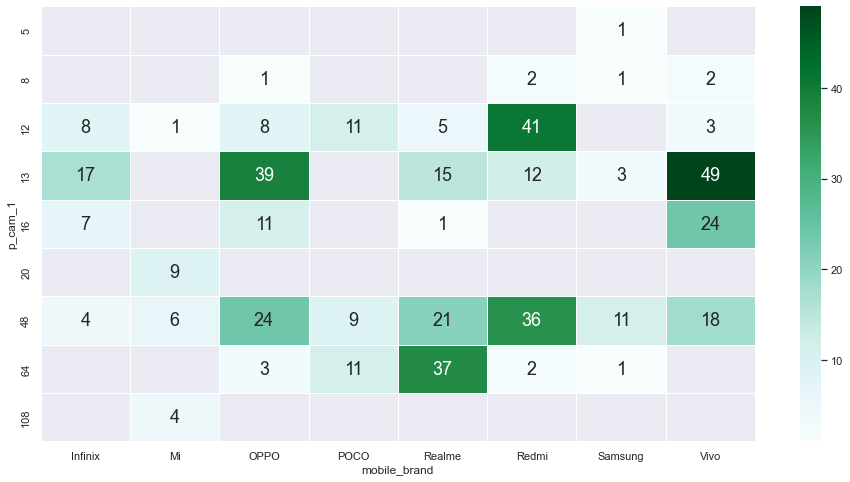

In [54]:
f = plt.figure(figsize=(16, 8))
sb.heatmap(mobileData.groupby(['p_cam_1', 'mobile_brand']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

# mobile_brand x p_cam_2

<AxesSubplot:xlabel='mobile_brand', ylabel='p_cam_2'>

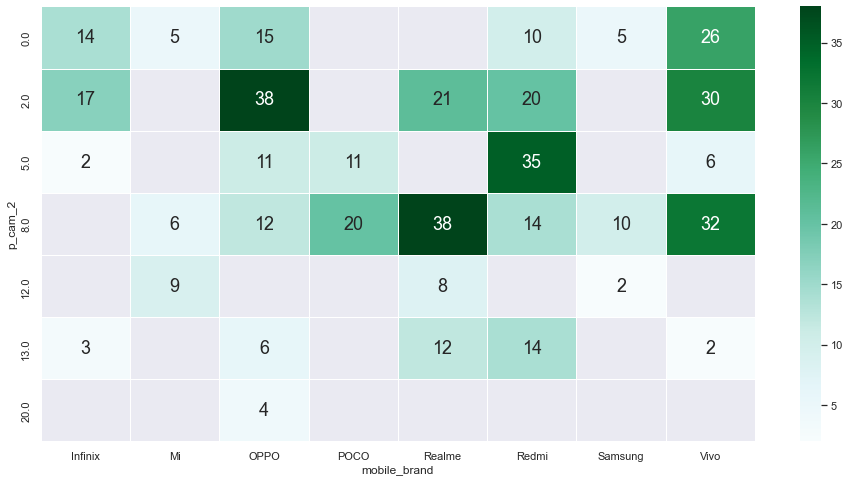

In [55]:
f = plt.figure(figsize=(16, 8))
sb.heatmap(mobileData.groupby(['p_cam_2', 'mobile_brand']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

# mobile_brand x p_cam_3

<AxesSubplot:xlabel='mobile_brand', ylabel='p_cam_3'>

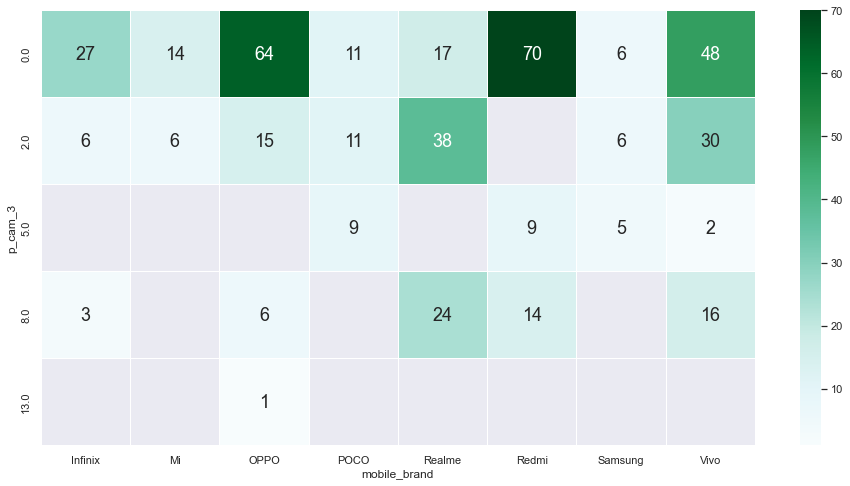

In [56]:
f = plt.figure(figsize=(16, 8))
sb.heatmap(mobileData.groupby(['p_cam_3', 'mobile_brand']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

# mobile_brand x p_cam_4

<AxesSubplot:xlabel='mobile_brand', ylabel='p_cam_4'>

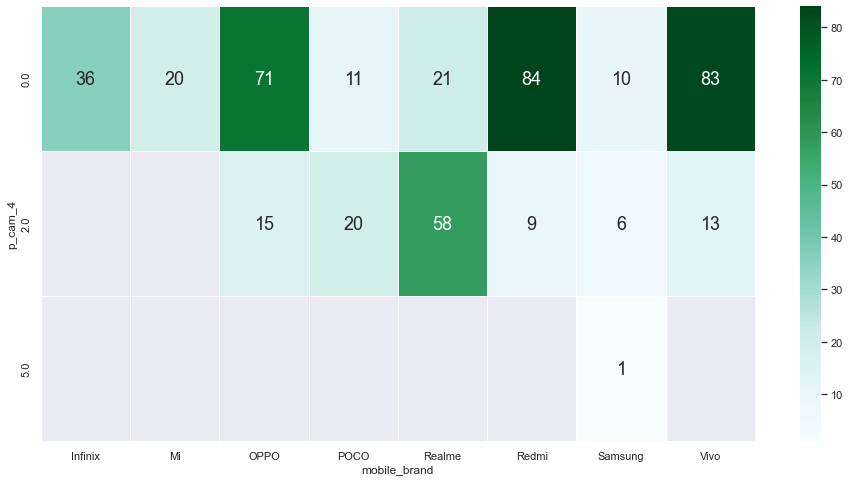

In [57]:
f = plt.figure(figsize=(16, 8))
sb.heatmap(mobileData.groupby(['p_cam_4', 'mobile_brand']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

Most phone has little more than 16 f_cam_1 but the spread of f_cam_1 is quite standardized for all the phones in general.

Most phone do not have f_cam_2

number of p_cam_1 is also quite standardized between phones.

p_cam_2 and p_cam_3 are quite standardized and even spread too for all the phones

Quite evenly spread for all phone brands but some extreme value like Samsung has more number (There is a phone with 5 p_cam_4) of p_cam_4

# Bi-Variate Analysis(Numerical Data) 

<AxesSubplot:>

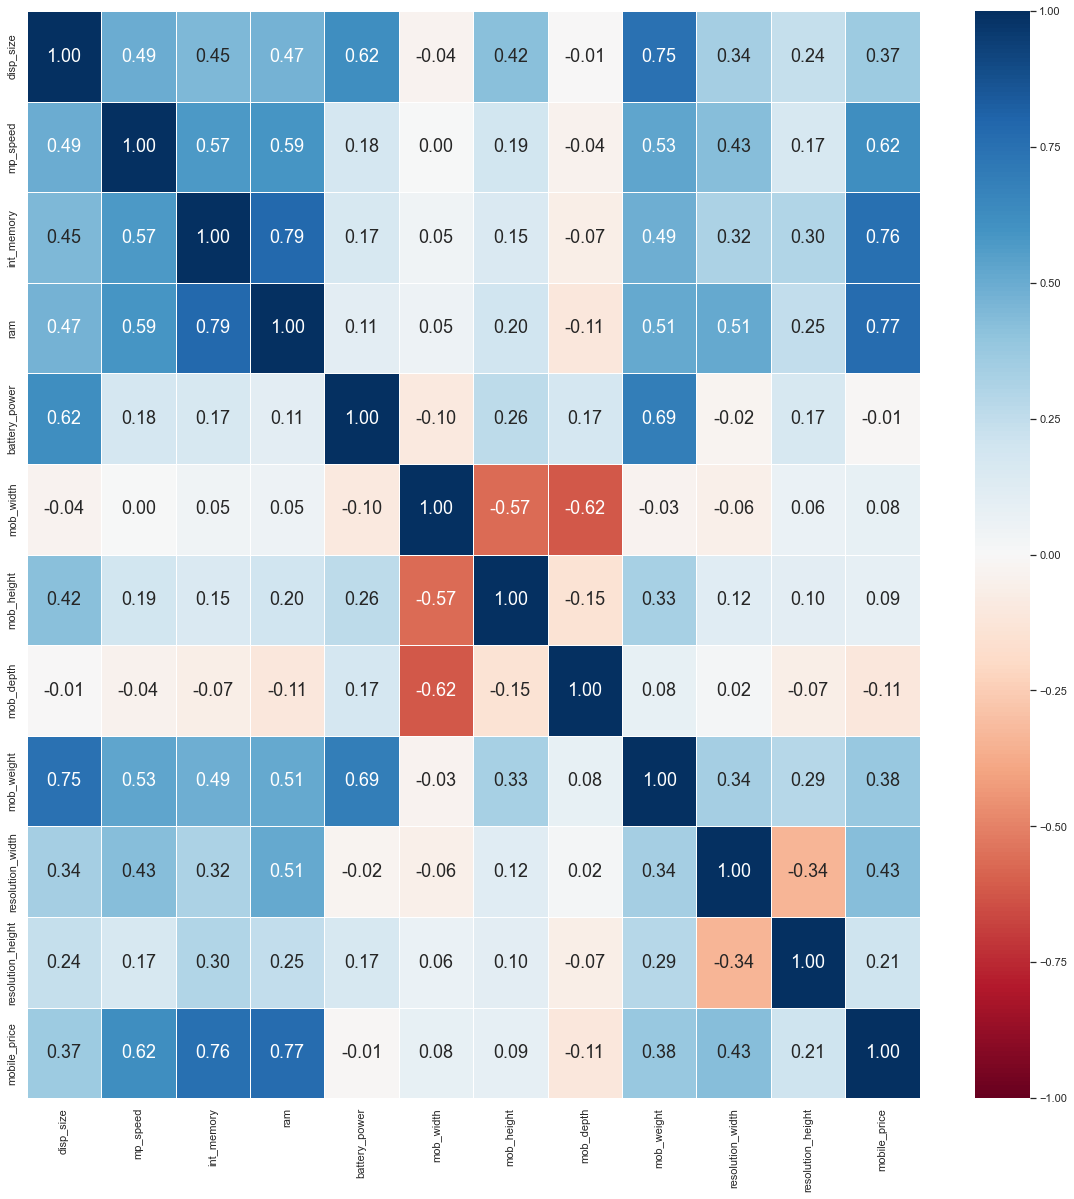

In [58]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(mobileNumDataFrame.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

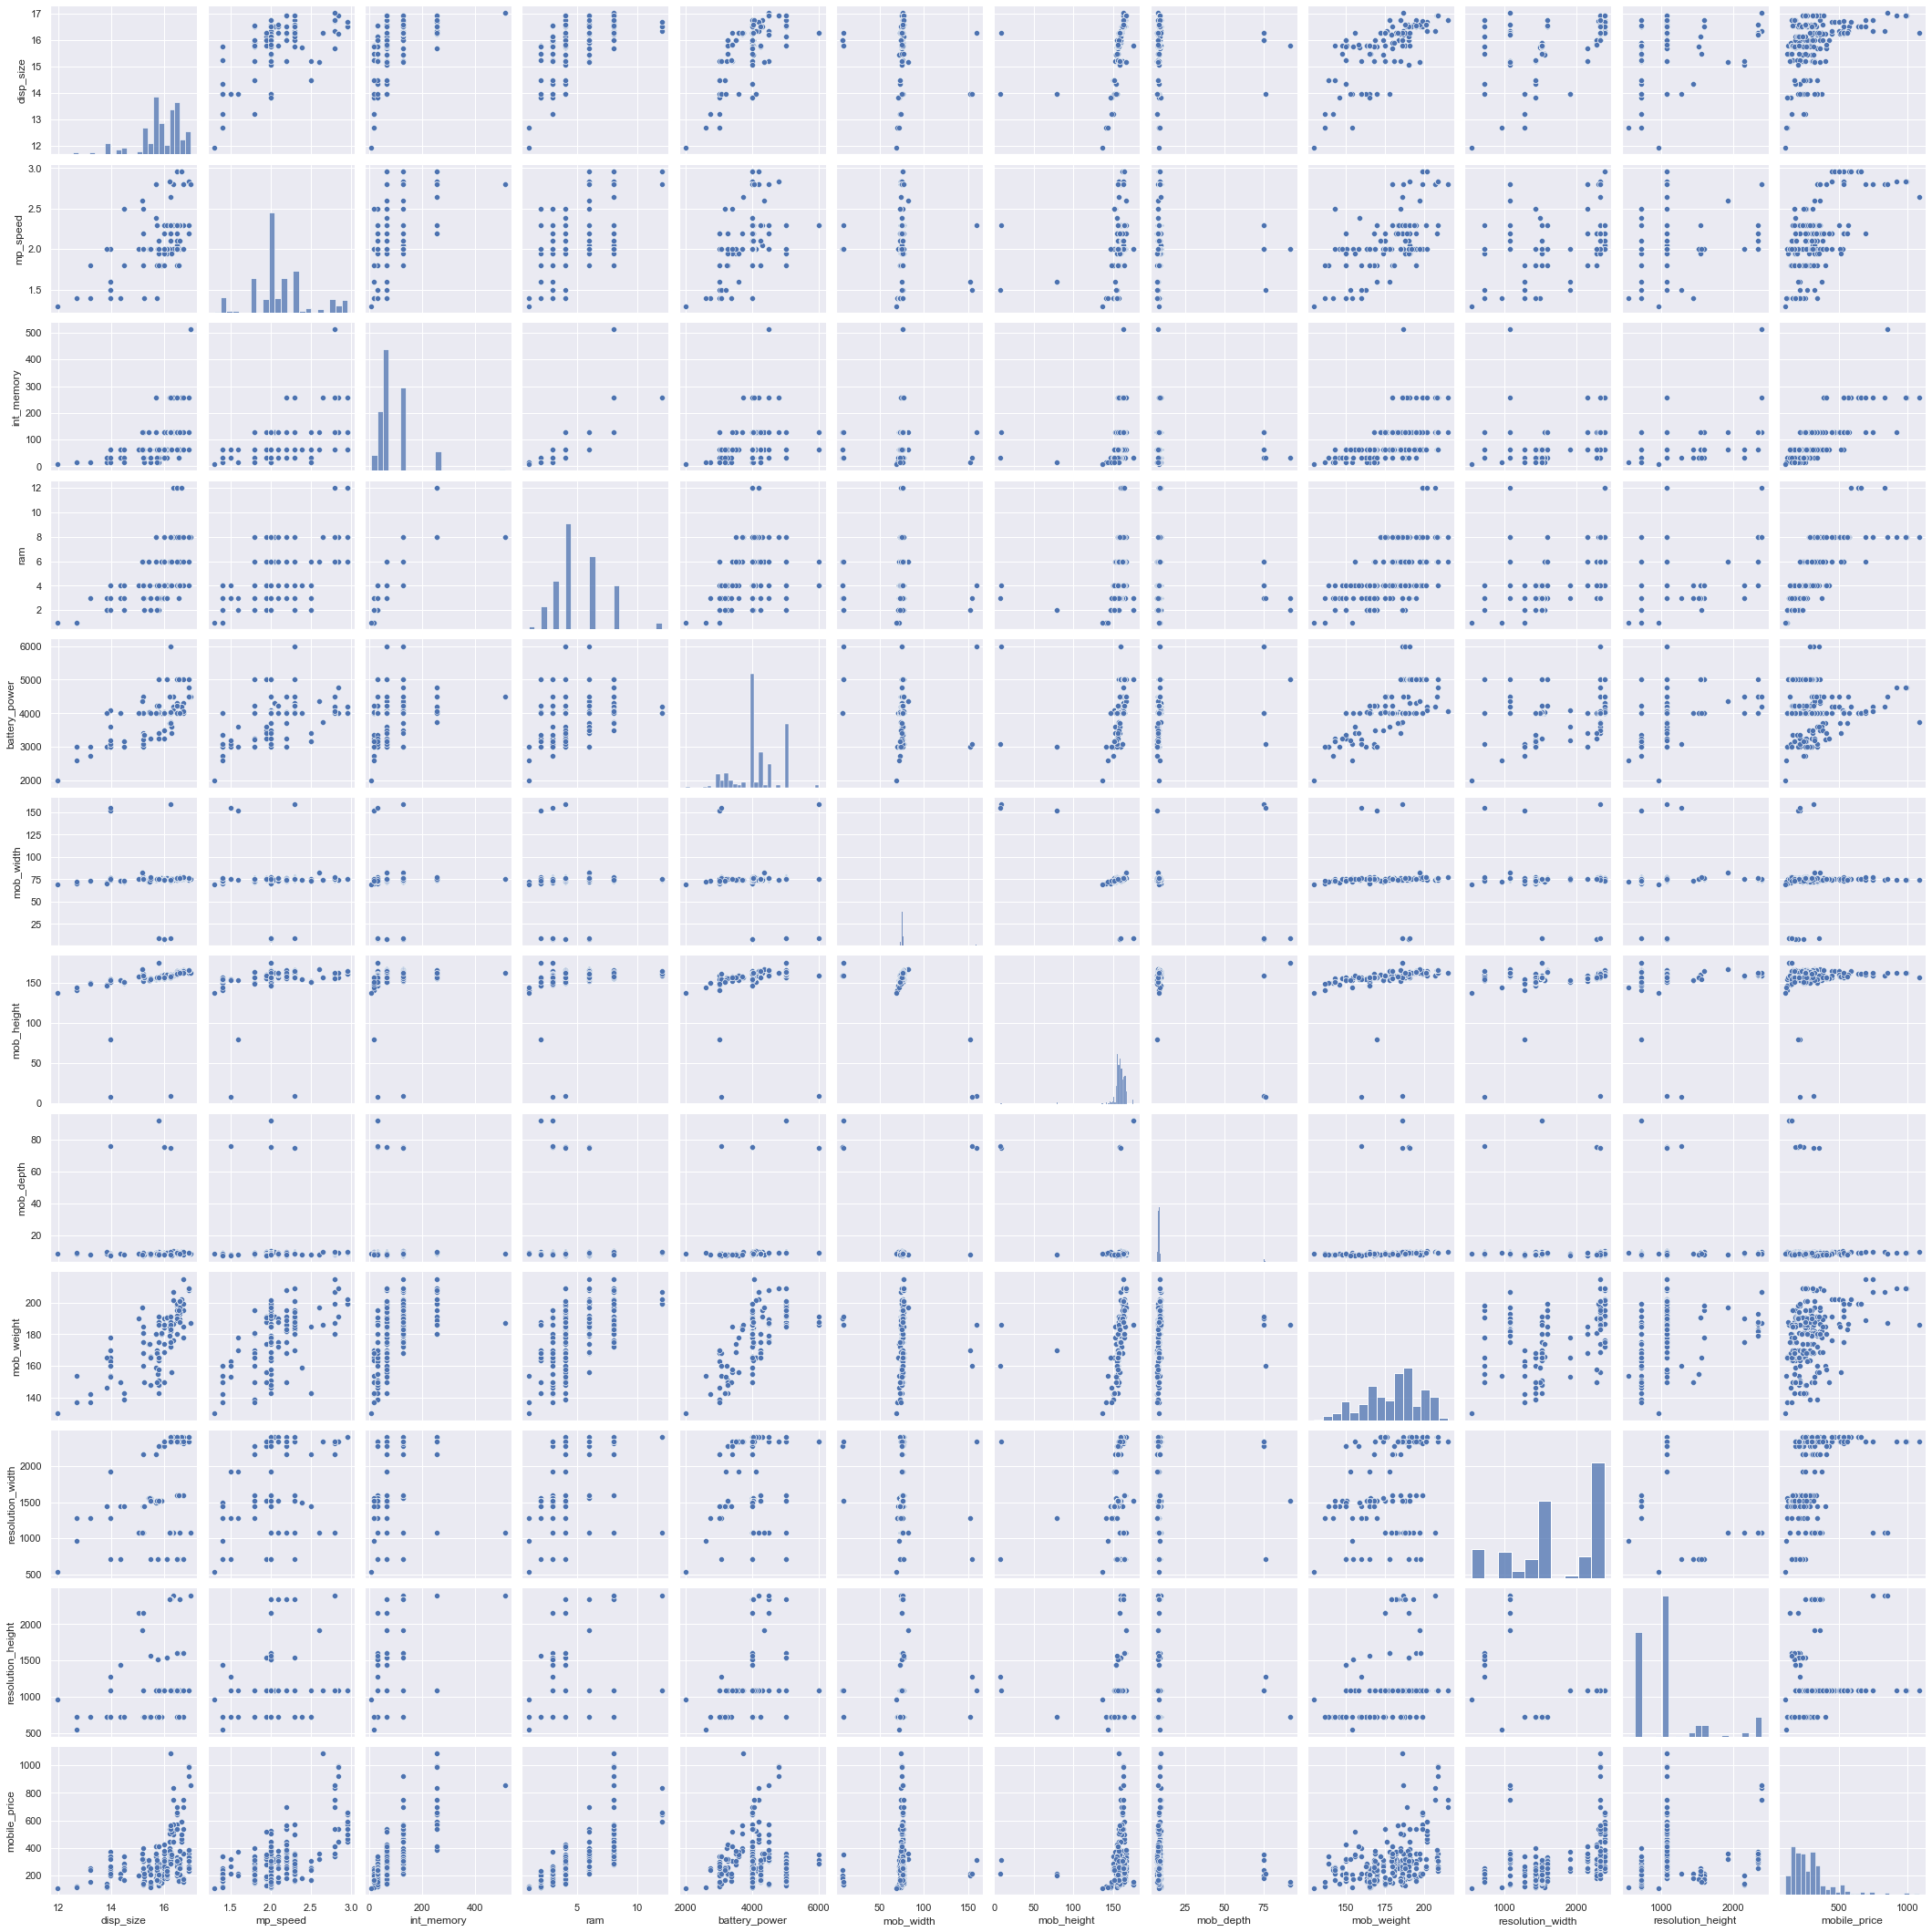

In [59]:
sb.pairplot(data = mobileNumDataFrame)

High correlation with mobile_price:
mp_speed &mobile_price: 0.62
int_memory & mobile_price: 0.76
ram & mobile_price:0.77
This is probably due to higher performance of smartPhone with better spec of memory, mp_speed and ram. Hence it also comes at a greater cost for production. Therefore the better the important features, the more expensive the phone is

disp_size & battery_power: 0.62
This is due to larger display size, the more power it needs to function at the same time, hecne the larget the display size, the larger the battery capacity.

int_memory & ram: 0.79
In production wise, it is preferred to build a phone with faster or compatible speed of processing speed, hence the larger the internal memory, the larger its ram so that it can function faster with both of these factors working together.

disp_size &mob_weight : 0.75
battery_power & mob_weight : 0.70
The larger the display size, the more complicated and efficient processor is needed, hence it should be more coponents and comp;licated hardware embedded in the mobile phones, hence it is heavier. The larger the battery capacity, the heavier it is too, hence the heavier the mobile phone weight.

mp_speed & int_memory: 0.57
mp_speed & ram: 0.59
To avoid bottleneck issues. If a phone has higher CPU speed but low RAM & Internal Memory, this CPU will not be able to perform well.

mob_width & mob_height: -0.57
mob_width & mob_depth : -0.62
Surprisingly, mob_width shows a negative relationship with both mob_height & mob_depth, which doesn't make sense at all. Based on our observation, there are some weird values in the mob_depth category. Perhaps some data were misaligned during the fetching process, and we will move on to remove those weird data before fitting them into our model.

mp_speed & mob_weight: 0.53
Higher mp_speed leads to larger mob_weight probably due to the higher the mp_speed, the more complex and advance the processor to run the phone, the complexity of the components in the phone adds more weight to the phone in order for it to run faster

ram & mob_weight: 0.51
The larger the ram could lead to more compact components packed insode the phone, hence it leads to greater weight as the complexity of the phone increase.

resolution_width & ram: 0.51
The larger the resolution width, the larger then ram it needs to fun the entire display as there are more pixels in total. Hence, the number of pixels changes per second increase, leading to larger number of data transfer happening per second. Therefore, larger ram is needed in response to the increase of resolution width.

<AxesSubplot:xlabel='mobile_color', ylabel='mobile_price'>

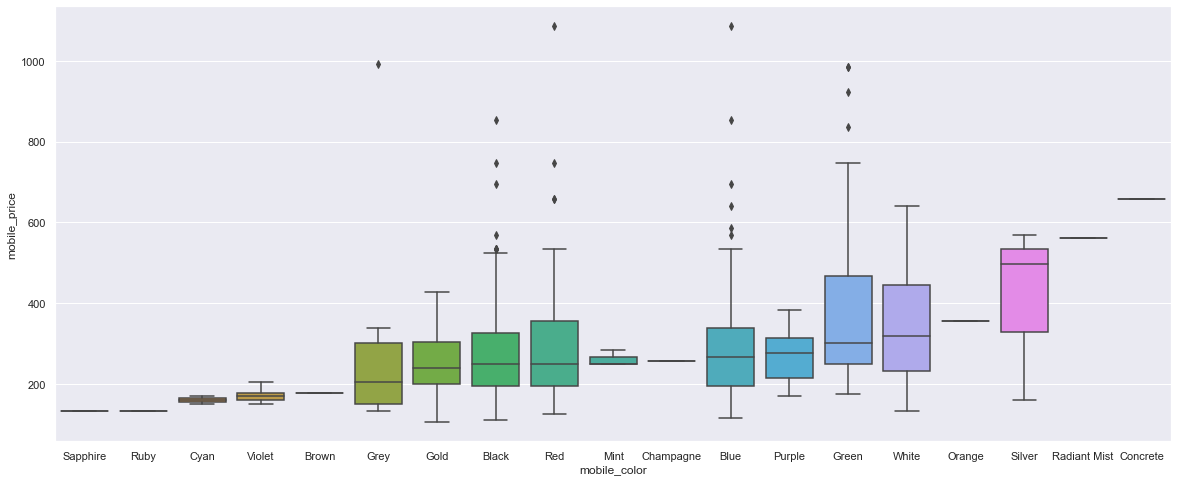

In [60]:
f = plt.figure(figsize=(20, 8))
sb.boxplot(x = 'mobile_color', y = 'mobile_price', data = mobileData, 
           order = mobileData.groupby('mobile_color')['mobile_price'].median().sort_values().index)


High relationship between type of colour and mobile_price as there is qite distinct and less overlap of median values.

This proves and shows how some rare color (like Concrete, Radiant Mist) are most costlier in production hence relating to higher selling price. This prob

But even if some colour is costlier, some is not too welcomed or liked by the users for example the Sapphire, Ruby, Cyan, and brown. Although they are special colour, probably due to users not fond of the colour causing drop in market value.

In short, colour is an important determinator for the mobile_price.

<AxesSubplot:xlabel='dual_sim', ylabel='mobile_price'>

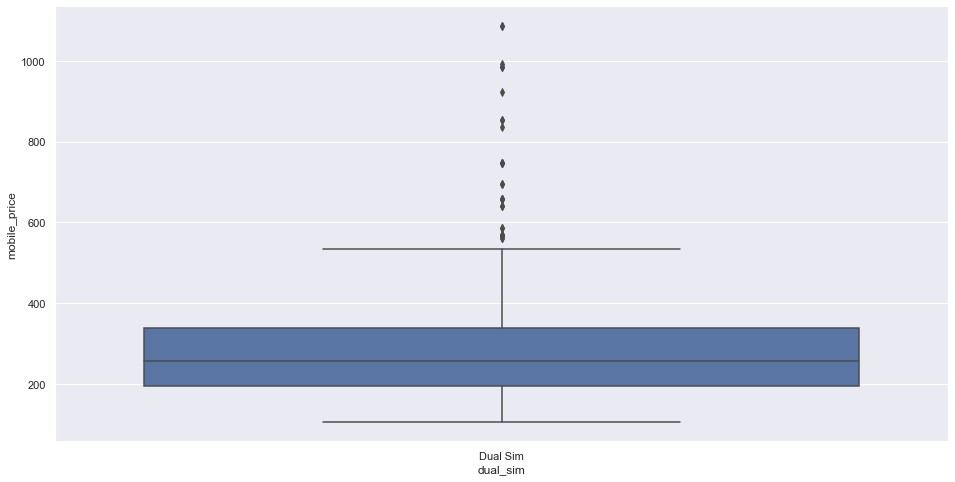

In [61]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x ='dual_sim', y = 'mobile_price', data = mobileData, 
           order = mobileData.groupby('dual_sim')['mobile_price'].median().sort_values().index)

No Relation as all phone is dual sim.

Dual Sim or not, it cannot be used to determine mobile_price.

<AxesSubplot:xlabel='os', ylabel='mobile_price'>

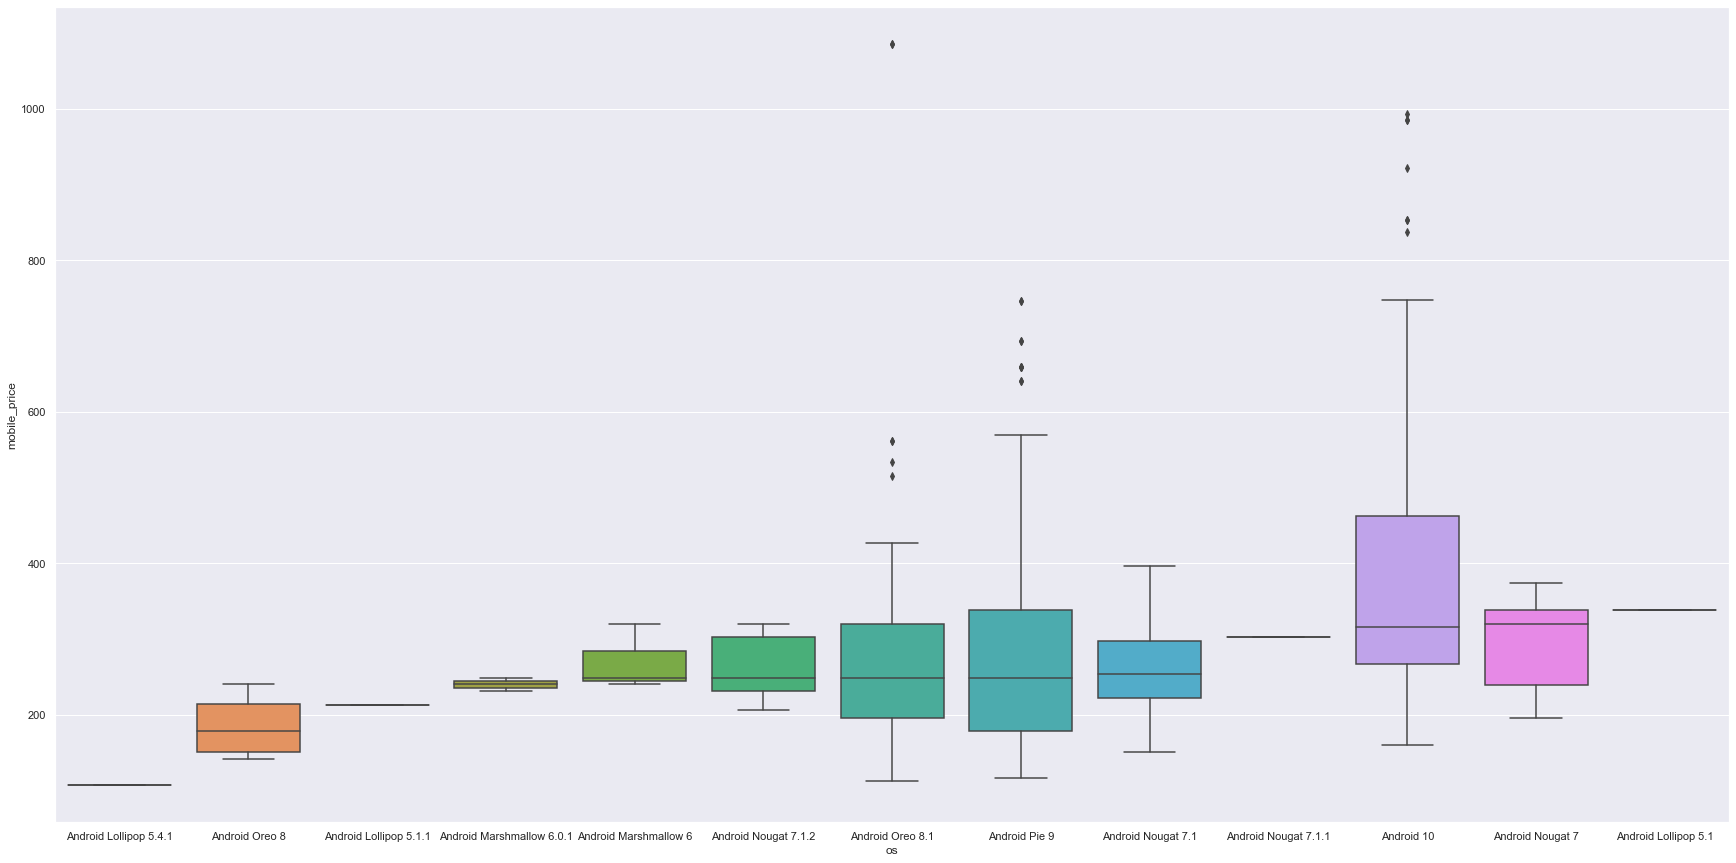

In [62]:
f = plt.figure(figsize=(30, 15))
sb.boxplot(x = 'os', y = 'mobile_price', data = mobileData, 
           order = mobileData.groupby('os')['mobile_price'].median().sort_values().index)

os is not a very good predictor for mobile_price as ther is no any clear partition of median values except (Andriod Lollipop, Android Oreo 8, Android Lollipop 5.1.1) 

Andriod Lollipop, Android Oreo 8, Android Lollipop 5.1.1 leads to lower mobile_price while the others are more expensive probably due to Andriod Lollipop, Andriod Oreo 8, Andriod Lollipop 5.1.1 are not a good processor in terms of speed and quality hence it is cheap as it has lower market value. Although OS is not a good predictor, it can still be used as a prediction variable to a certain extent. 

<AxesSubplot:xlabel='num_cores', ylabel='mobile_price'>

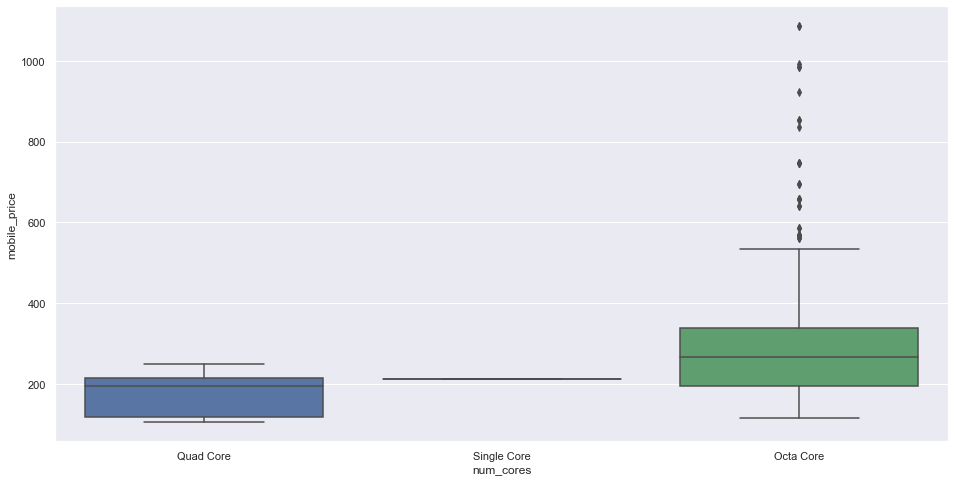

In [63]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'num_cores', y = 'mobile_price', data = mobileData, 
           order = mobileData.groupby('num_cores')['mobile_price'].median().sort_values().index)

Octa Core is generally more expensive. hence it is easier to classify the price of the phone given an octacore or not

There is a faint relation between num_cores and mobile_price but the relation is even weaker between QuadCore and Single Core machine with mobile_price respectively as their median values are very very close. 

Therefore, we know that Octa Core machine is relatively more expensive than Quad Core or Single Core machine as it is more advance and satisfy the consumers' need for higgher performance. So there is a relatively strong relation between(the OctaCore and non-Octa) core machine in predicting mobile price.

<AxesSubplot:xlabel='network_top', ylabel='mobile_price'>

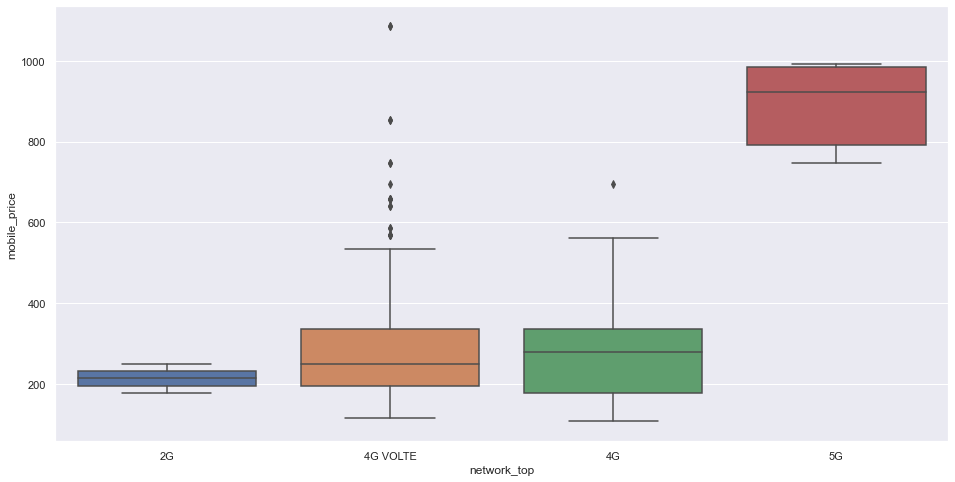

In [64]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'network_top', y = 'mobile_price', data = mobileData, 
           order = mobileData.groupby('network_top')['mobile_price'].median().sort_values().index)

5G network is the most expensive due to more advance technology used, the relation here is 5G or non-5G phone VS mobile_price

There is a strong relation herebetween (5G and non5G) against mobile price as the median value or 5G machines is distinctively higher than non 5G machine(2G, 4GVolte,4G).

notwork_top can be used as a predictor.

<AxesSubplot:xlabel='f_cam_1', ylabel='mobile_price'>

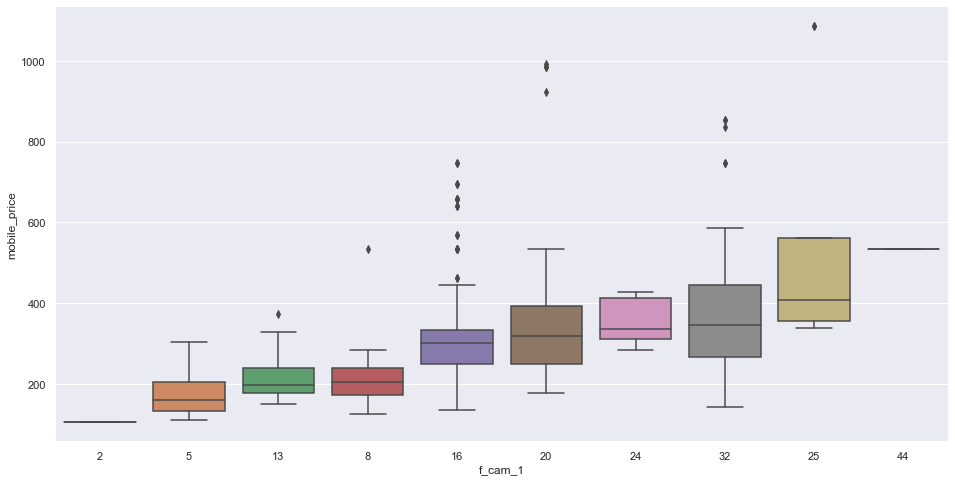

In [65]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'f_cam_1', y = 'mobile_price', data = mobileData, 
           order = mobileData.groupby('f_cam_1')['mobile_price'].median().sort_values().index)

The number of f_cam_1 has high relationship with mobile_price. It is a good predictor. This shows how important the pixels of camera lead to the rise of mobile_price.

<AxesSubplot:xlabel='f_cam_2', ylabel='mobile_price'>

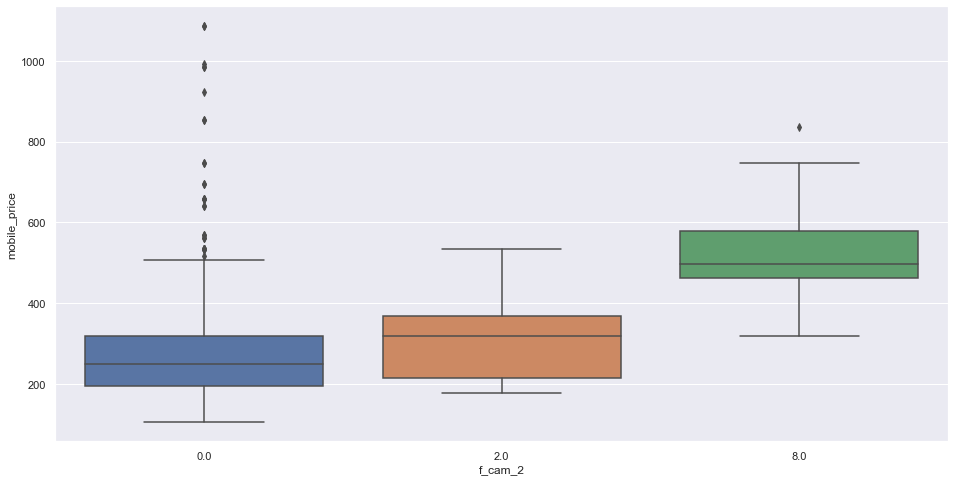

In [66]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'f_cam_2', y = 'mobile_price', data = mobileData, 
           order = mobileData.groupby('f_cam_2')['mobile_price'].median().sort_values().index)

Moderate relationship between f_cam_2 and mobile_price

In general, there is relation between ( 8.0 f_cam_2 and less than 8.0 f_cam_2) with mobile price. The higher pixels of camera, the more expensive the mobile_price. as the median value of 8.0f_cam_2 is significantly higher than less than 8.0f_cam_2 smartphone.

thus, f_cam_2 can be used as a predictor as higher pixels of camera will lead to increast in cost of production of phone. 

<AxesSubplot:xlabel='p_cam_1', ylabel='mobile_price'>

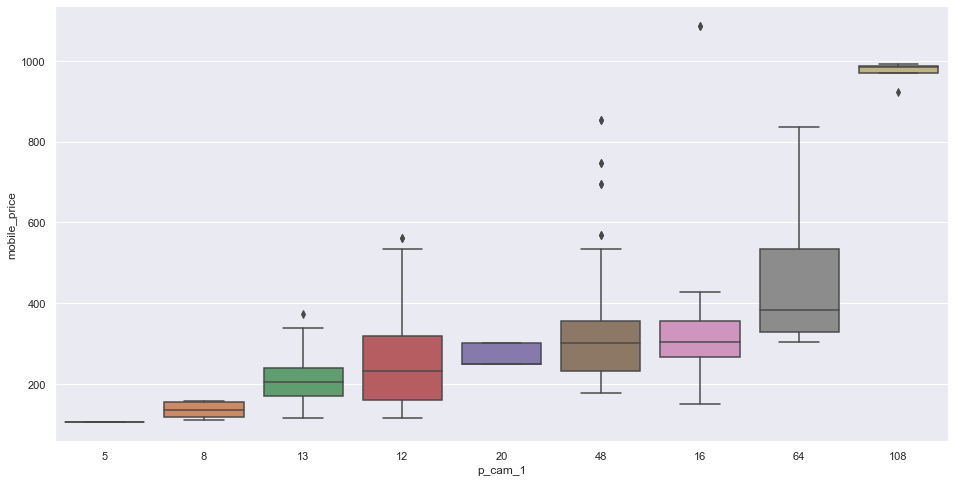

In [67]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'p_cam_1', y = 'mobile_price', data = mobileData, 
           order = mobileData.groupby('p_cam_1')['mobile_price'].median().sort_values().index)

High relationship between p_cam_2 and mobile_price as there are quite distinct level and distribution of median values of p_cam_1. It can be a good predictor due to cost in production when pixels of built in cameras increase.


<AxesSubplot:xlabel='p_cam_3', ylabel='mobile_price'>

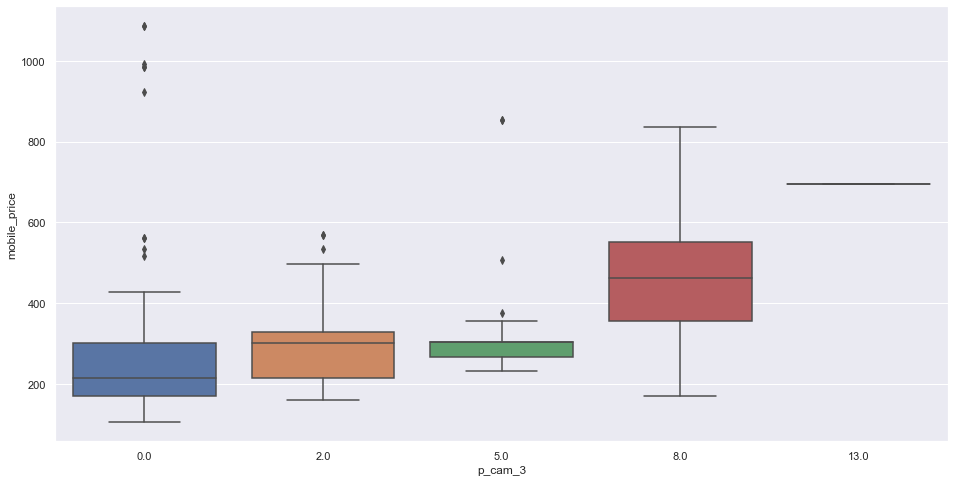

In [68]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'p_cam_3', y = 'mobile_price', data = mobileData, 
           order = mobileData.groupby('p_cam_3')['mobile_price'].median().sort_values().index)

High relationship between p_cam_3 and mobile_price also due to partition of mobile_price via different category of p_cam_3. It can be a good predictor

<AxesSubplot:xlabel='p_cam_4', ylabel='mobile_price'>

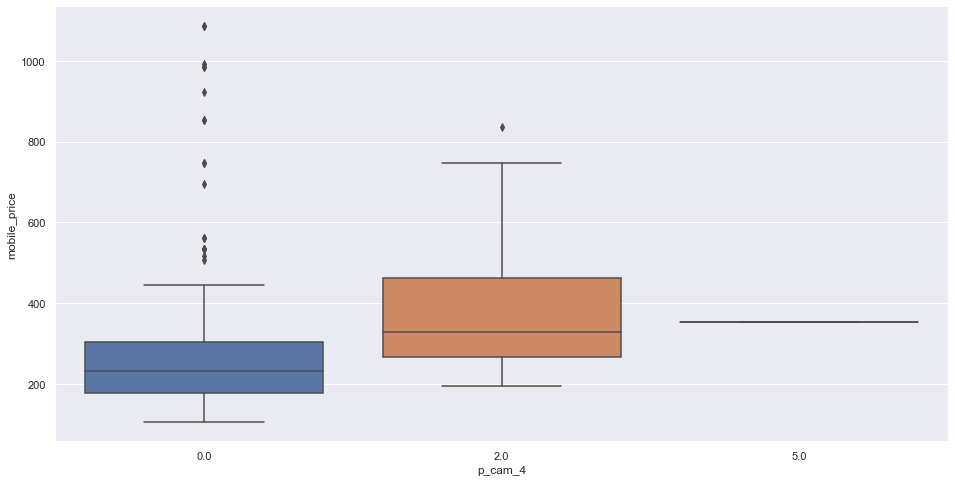

In [69]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'p_cam_4', y = 'mobile_price', data = mobileData, 
           order = mobileData.groupby('p_cam_4')['mobile_price'].median().sort_values().index)

Weak relationship between (more than 2p_cam_4 and ZERO p_cam_2) and mobile_price but still can be used as a predictor as lower pixels of camera require lower cost of production of a smart phone.